![Header.png](attachment:Header.png)

# CSC312 – Machine Learning 2023 – Neural Networks Mini-Project

# [25 marks]

# Assignment 3

This is the third and final assignment of the machine learning course and will be the only assignment on neural networks. This notebook is detailed enough and clearly specifies what you are required to do. This notebook does not contain any interactive feedback cells. Rather, at each stage of the assignment, you're given complete detail on what to do along with possible (expected) results, in order to give you an indication of whether you are on track with your implementation.

This assignment requires you to implement neural networks, that includes e.g. forward propagation, the cost function, back propagation etc. The data sets are provided along with this notebook. The assignment consists of several parts, but some parts are for your learning purposes and not for marks.

**Important Note**: Please take care to only fill in code between the two comments that I put in as follows:

```
#FILL IN BELOW

#STOP FILLING IN HERE
```

Hardly anything else needs to be changed. There are things you can toy with though. Use your discretion. This **is** for marks after all.

Very importantly, you'll see a ```debug``` variable or function parameter from place to place. Don't touch, change or otherwise manipulate this in any way. Doing so will render your work unmarkable.

Marks aside, I spent uncountable hours creating and carefully tweaking this notebook to give you exposure to almost every concept we discussed in class to do with Neural Networks, as well as optimization (overfitting and underfitting), multi-class classification, evaluation etc. so please try and use this opporunity to learn. You will see it all in action.

This practical provides the ability to make use of several data sets. I would strongly suggest not changing the data set initially. I would strongly strongly suggest just using the noisy-moons data set. This will ensure the best learning experience. In the last part of this notebook, I've taken the effort to combine everything into one cell where you can try out different data sets and parameters freely. Still, the choice is yours.

After you're done coding, feel completely free to toy with parameters in Part Z e.g. try increasing (or decreasing) the degree of the polynomial used in the second part of the assignment, and see what the effect is; try increasing or decreasing learning rates, number of iterations etc. There's lots to be learned here.

And do note that, since we're working on classification problems here, the NN cost function we're using here is also (like logistic regression) a bit (actually a LOT) sensitive; one wrong move and you either have ```NaN``` or ```InF``` errors. These errors aren't irreversible or dangerous, so do feel free to experiment. But it might be wiser, when you toy with things, to try and make small changes to initial $\theta$ and $\alpha$ parameters, as well as the number of iterations, e.g. might not be such a good idea to go from $\alpha=0.1$ suddenly to $\alpha=10$.

**NOTE ON VARIABLE NAMING:** As with previous assignments, I've tried to ensure that global variables are in ALL CAPS, while local variables in functions are in all smalls (or mostly smalls); this helps prevent referring to global variables mistakenly within functions, thereby causing chaos. If you create variables in functions, aim to use all smalls.

**VERY IMPORTANT NOTE:** This assignment is worth a large portio of the CSC312 ML Mark. Take it seriously.

**VERY IMPORTANT NOTE:** Your notebook will be auto-marked. The output of the marked functions will either be 100% right or 100% wrong. Either your output is perfect in both value(s) and format(s), or it isn't. When you go out there and get a dev job, you'll be required to produce code that meets very exact and precise specs. Calling your manager over and saying "But this value it produces is still right. Can I still get marks for this?" No you can't. It's either right or wrong. If it fails the auto-marker test, it fails.

**Submission**:

You will need to upload your final working notebook onto the relevant iKamva CSC312 Assignment page. **Please take note of the following important points (and doing so will ensure that you don't lose unnecessary marks)**:

1. Please fill in your student number in the cell below this one. This is necessary for auto-marking purposes.

2. DO NOT zip or compress your file in anyway. Upload only the raw ".ipynb" notebook file itself.

3. I have noticed in a few cases that students will submit a file that has an extension ".ipynb.html" and these are unmarkable / corrupt. I'm not sure but my educated guess is that such students try and save their notebook by pressing ```Ctrl-S``` or ```File```$\rightarrow$```Save``` in their browser, and then save it as an ```.html``` file. Beware of this pitfall. This will result in an unmarkable file.

4. Make sure that you only have one finalized version of your notebook uploaded. iKamva allows you to make several submissions and stores them all. You need to finally only keep the latest one that you want marked, otherwise we won't know which one to mark. We'll have to pick one randomly.

5. DO NOT re-upload the supporting "planar utils" Python file along with your submission. You only need to submit your ".ipynb" file.

6. Do NOT email me your submission for any reason at any time. Only submissions submitted on iKamva in time will be marked. If you miss the deadline, the "train has left", "the plane has taken off", "the loadshedding has started"...


Bon apetit.

### VERY IMPORTANT: YOUR STUDENT NUMBER

Please set the mystudentnumber variable below to your student number.

In [92]:
mystudentnumber = "3848958" #Please set this.

### Some Initializing Code

Run the code below to initialize the notebook. Don't change any of it.

In [93]:
DEBUG = 0

import numpy as np
import pandas as pd
from IPython.display import display,HTML

ass_date_met = "7721hdjfh56nkf771!190sd1hdjfhjhs0071!skskhb0091hdjfh77262jhdywyyuqkjbsdu0811hdjfhnkf771!hslknhd7612oi7!#daiw@_dieijfijd$##*Dkdjhq91hdj1hdjfhfhjhdfi1998nkf771!7nkknkf771!@#!@likkhdh1hdjfhuhs919872863jnjhg23"
sets = ['449f', 'bce2', 'ee42', 'b758']
sets += ['bcc4', 'ab65', 'ccd3', 'c6f1']
lend = "\n".join(sets)

np.set_printoptions(suppress=True)

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


In this problem, we'll be making use of a series of data sets with two features ($x_0$ and $x_1$) and two classes that can only be separated by a non-linear decision boundary. We'll be creating and using a neural network to model these data sets.

---

## Part A -  Reading, Readying, and Plotting the Data

### Reading in the Data

The first step is to load the data. The data is loaded from an external script that automatically generates the data sets. Run the script below.

In [94]:
from planar_utils import *

np.random.seed(1) # set a seed so that the results are consistent

#Leave this as is initially, but feel free to change it later. This specifies how many data points will be contained in the data sets.
N = 400

noisy_circles, noisy_moons, blobs, gaussian_quantiles = load_extra_datasets(N)
planar_data = load_planar_dataset()


datasets = {'noisy_circles': noisy_circles,
            'noisy_moons': noisy_moons,
            'blobs': blobs,
            'gaussian_quantiles': gaussian_quantiles,
            'planar': planar_data}


The script loads five different data sets, namely, the ```noisy_circles```, ```noisy_moons```, ```blobs```, ```gaussian_quantiles``` and ```planar``` data sets. In the code below, you can specify which of the data sets you'd like to use. Practically speaking, since they are all 2-class data sets, it shouldn't make any difference which you use. You're also free to change around the data set once you're done writing all of your Neural Network (NN) code to see how it would work on each data set.

In [95]:
#I would advise leaving the line below as is initially
#And once everything is working, change it to see how it works
#on other data sets
#Options: noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure
dataset = "noisy_moons"


#DON'T CHANGE ANYTHING BELOW
X, Y = datasets[dataset]

X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == blobs:
    Y = Y%2

X,Y = X.T,Y.T

#Convert the numpy array to a pandas DataFrame
#and display the first 10 rows as html
datadisplay = pd.DataFrame(np.hstack((X,Y)))
datadisplay.columns = ["x1","x2","y"]
datadisplay["y"] = datadisplay["y"].astype(int)
display(datadisplay.head(20))

,x1,x2,y
0,-1.044475,0.504478,0
1,-0.090460,0.847058,0
2,0.827203,0.122143,0
3,1.207337,-0.716480,1
4,-0.071733,0.484330,1
5,0.508494,-0.248622,1
6,-0.814097,-0.241485,0
7,1.148401,0.343829,0
8,0.864095,-0.607039,1
9,1.002816,-0.471706,1


### Visualizing the Data (If Possible)

Once loaded, it is a good idea to try  and visualise the data. Generally in data science, visualising the data is recommended (where possible) in order to give you a sense of the underlying structure of the data and/or the kind of function that you may need to use as a decision boundary. However, **note** that for more than two features in a classification model (which is almost all classification problems one will every encounter), this is not possible, unless you plot them in pairs, or something like that...

So to skip forward, I've gone ahead and displayed the plot of the points below.


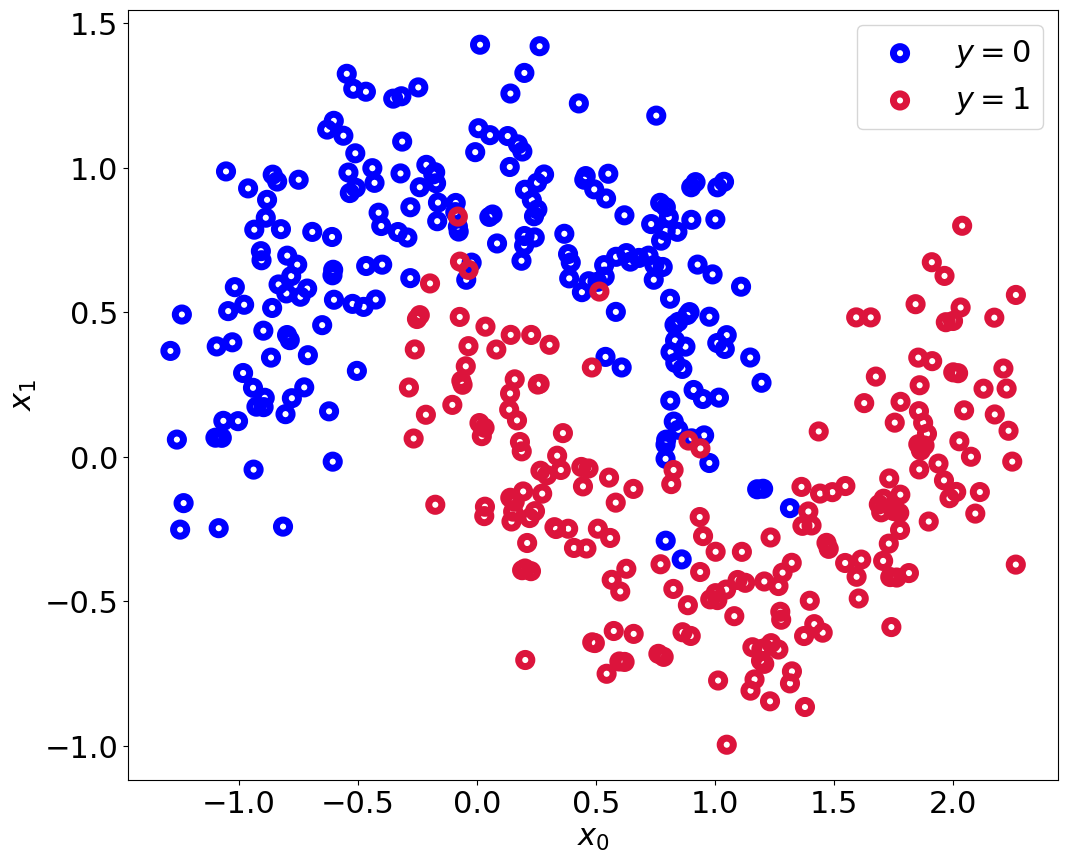

In [96]:
plotDecisionBoundary(X,Y,"$x_0$","$x_1$",debug=DEBUG)

### Dividing up the Data Into Train and Test Sets

So technically speaking, if we had a file with a bunch of data, at this stage we would have had to manually set ```X``` and ```Y``` as we did in the previous two pracs, but luckily the function in the previous step has automatically set these for us.

We will now go ahead and divide up the data into train, CV and test sets.

I've generously put in the code for you.

In [97]:
from sklearn.model_selection import train_test_split

MTRAINRATIO = 0.5 #Ratio of total samples used for training
MCVRATIO = 0.5 #Ratio of testing samples used for CV

MTRAIN = int(X.shape[0] * MTRAINRATIO) #Get number of training samples
MTEST = X.shape[0] - MTRAIN #Testing samples is everything that remains
MCV = int(MTEST * MCVRATIO) #Get number of CV samples
MTEST = MTEST - MCV #Testing part is everything that remains

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X,Y,train_size=MTRAIN,random_state=1,stratify=Y,shuffle=True)
X_CV, X_TEST, Y_CV, Y_TEST = train_test_split(X_TEST,Y_TEST,train_size=MCV,random_state=1,stratify=Y_TEST,shuffle=True)

In [98]:
from sklearn.preprocessing import StandardScaler

def getScaledX(X):
    X_scaled = np.zeros(X.shape)
    scaler = None

    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)

    return X_scaled,scaler


X_TRAIN_SCALED, SCALER1 = getScaledX(X_TRAIN)
X_TEST_SCALED = SCALER1.transform(X_TEST)
X_CV_SCALED = SCALER1.transform(X_CV)

### Preparing the $y$ Vectors Using One-Hot Encoding (If Necessary)

As explained in lectures, if the number of classes $K = 2$, then we will only use a single output node and the $y$ vector will remain as it is. However, if $K \geq 3$, then we will have $K$ output nodes and we will have to reformat our $y$ vector(s) using one-hot-encoding.

Given a column vector of labels $y$ with ascending labels starting from 0, the one-hot-encoded vector $\widehat{y}$ corresponding to $y$ is a vector with the same number of rows as $y$ and $K$ columns in which the value of each row in $y$ specifies the index of the column in $\widehat{y}$ of the same row that should be set to 1. All other values are zeros.

This can either be done in vectorized format with numpy indexing magic, or a loop if you want to. Up to you. Since we'll only ever do this operation a very small number of times, it isn't criticial that it be vectorized.

Go ahead and complete the function below to produce the matrix ```yhat``` corresponding to a given ```y```, as per the spec described.

**[2 marks]**

In [99]:
def onehotenc(y):
    #y - a column vector with one label per row, assumed to contain ascending labels from 0 up to K.

    k = len(np.unique(y)) #You will need this. Don't change. Number of classes K.
    yhat = np.array([0])

    #FILL IN CODE BELOW:

    #You need to set the variable yhat correctly
    yhat = np.zeros((y.shape[0], k))

    #Code to set the variable yhat correctly. I would suggest first setting the dimensions of yhat correctly and then proceeding to set its values.
    yhat[np.arange(y.shape[0]), y.flatten()] = 1

    #STOP FILLING IN HERE

    return yhat.astype("int")

To give you an indication:

- Given a ```y``` vector $\begin{bmatrix}1\\
0\\
1\\
2\\
1\end{bmatrix}$, ```onehotenc``` should produce a ```yhat``` matrix $\begin{bmatrix} 0 & 1 & 0\\
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1\\
0 & 1 & 0
\end{bmatrix}$

-

- Given a ```y``` vector $\begin{bmatrix} 1\\
 3\\
 2\\
 1\\
 0\\
 3
\end{bmatrix}$, ```onehotenc``` should produce a ```yhat``` matrix $\begin{bmatrix} 0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}$

In [100]:
#Snippet for you to try out your function
YMAT = np.array([1,3,2,1,0,3]).reshape(-1,1) #Interesting question: what does setting an array dimension to -1 do??


print(onehotenc(YMAT))

[[0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]]


---

## Part B -  Implementing the Neural Network Functionality

Now we're going to proceed to construct all the functions required to create Neural Networks of varying sizes (both layers and nodes). Note that this is certainly not **the** way to do it (i.e. this is not the only way it can be done), but **a** way to do it. Follow the steps below.

Note that we're going to be using the Python `Dict` data structure to store and manage all the $\Theta$ parameters of the neural network. If you're not familiar with them, it is a seriously good idea to go and get up to speed before continuing with this assignment.

I've provided two helper functions below which you can use to display the contents of various matrices and/or their dimensions, possibly to compare to expected outputs to see if you're on the right track. I've provided example usages so you can see how they could be used.

In [101]:
#I've provided these two helper functions for you. Use them if you wish.
def getMatSizes(dictt,lab="Mat"):
    '''
    Author: M Ghaziasgar
    Returns a string containing very visually friendly/appealing dimensions of the matrices in a dict
    Args:
        dictt: A dictionary in which each key refers to a numpy matrix of values e.g. a thetas dict
        lab: (Optional) Just a label that describes the dictionary passed in e.g. \Theta will display a proper mathematical Theta

    Returns: A string that needs to be displayed using printmd function

    '''
    return("\n".join([" - ${}^{}$: $({} \\times {})$ matrix".format(lab,l,dictt[l].shape[0],dictt[l].shape[1]) for l in dictt]))

def getMatSummary(arr, lab="", showcolshead=None, showcolstail=None, showrowshead=None, showrowstail=None, rounding=8):
    '''
    Author: M Ghaziasgar
    Returns a string containing very visually friendly/appealing depiction of a single numpy matrix
    Args:
        dictt: A numpy matrix of values
        lab: (Optional) Just a label that describes the matrix passed in e.g. \Theta^1 will display a proper mathematical Theta with a superscript 1
        showcolshead: How many columns to show to the left (beginning - head) of the matrix (used to limit size of large arrays). If None, display the whole array. If set to a value larger than the number of columns, will default to displaying the whole array.
        showcolstail: How many columns to show to the right (end - tail) of the matrix (used to limit size of large arrays). If None, display the whole array. If set to a value larger than the number of columns, will default to displaying the whole array.
        rounding: Number of digits to round to: default 8

    Returns: A string that needs to be displayed using printmd function
    '''

    r, c = arr.shape

    disp = ""

    lab = lab + " \\approx " if lab!="" else ""

    if showcolshead==None or showcolstail == None:
        showcolshead = c -1
        showcolstail = 1

    if showrowshead==None or showrowstail == None:
        showrowshead = r -1
        showrowstail = 1

    #If we're showing all rows, no need for dots
    if showrowstail+showrowshead < r:
        showallrows = False#True
    else:
        showallrows = True#False


    if showrowstail + showrowshead > r:
        showrowshead = r -1
        showrowstail = 1

    if r == 1:
        showrowshead = 1
        showrowstail = 0

    #If we're showing all columns, no need for dots
    ldots = " & \\ldots " if showcolstail+showcolshead < c else ""

    if showcolstail + showcolshead > c:
        showcolshead = c -1
        showcolstail = 1

    ampersand = " & "
    if (showcolshead == 0):
        ampersand = ""

    if rounding:
        arr = arr.round(rounding)


    disp = "$" + lab + "\\begin{bmatrix} " + "\n" + \
           "\\\\\n".join([" & ".join(map(str, list(arr[rw, 0:showcolshead]))) + ldots + ampersand + " & ".join(
        map(str, list(arr[rw, c-showcolstail:c]))) for rw in range(showrowshead)]) + "\\\\\n"

    if not showallrows:
        #Three times below because we want three vertical dots for the row break
        disp += "&".join([" . " for cc in range(showcolshead)]) + ldots + ampersand + "&".join([" . " for cc in range(c-showcolstail,c)]) + "\\\\\n"
        disp += "&".join([" . " for cc in range(showcolshead)]) + ldots + ampersand + "&".join([" . " for cc in range(c-showcolstail,c)]) + "\\\\\n"
        disp += "&".join([" . " for cc in range(showcolshead)]) + ldots + ampersand + "&".join([" . " for cc in range(c-showcolstail,c)]) + "\\\\\n"


    disp += "\\\\\n".join([" & ".join(map(str, list(arr[rw, 0:showcolshead]))) + ldots + ampersand + " & ".join(
        map(str, list(arr[rw, c-showcolstail:c]))) for rw in range(r-showrowstail,r)])

    # else:
    #     disp = "$" + lab + "\\begin{bmatrix} " + "\\\\\n".join([" & ".join(map(str, list(arr[rw, 0:showcolshead].round(rounding))))
    #     + ldots + ampersand
    #     + " & ".join(map(str, list(arr[rw, c-showcolstail:c].round(rounding)))) for rw in range(r)])

    if r == 1:
        disp += "\\end{bmatrix}$"
    else:
        disp += "\n\\end{bmatrix}$"
    return disp

thetastry = {1:np.array([[0.417,0.72,0.0,0.302,0.147,0.092,0.186,0.346,0.397,0.539,0.419],[0.685,0.204,0.878,0.027,0.67,0.417,0.559,0.14,0.198,0.801,0.968],[0.313,0.692,0.876,0.895,0.085,0.039,0.17,0.878,0.098,0.421,0.958]]),
              2:np.array([[0.186,0.346,0.397,0.539,0.419],[0.559,0.14,0.198,0.801,0.968],[0.17,0.878,0.098,0.421,0.958],[0.685,0.204,0.878,0.027,0.67],[0.313,0.692,0.876,0.895,0.085]])}
#Dislay the entire array of thetastry1[1]
printmd(getMatSummary(thetastry[1],"\Theta^1"))
#Dislay the first 3 columns and last 5 columns of thetastry1[1]
printmd(getMatSummary(thetastry[1],"\Theta^1", showcolshead=3, showcolstail=5))
#Dislay the first column and last column of thetastry1[2]
printmd(getMatSummary(thetastry[2],"\Theta^2", showcolshead=1, showcolstail=1))
#Display size of the array
printmd(getMatSizes(thetastry,"\Theta"))

printmd(getMatSummary(thetastry[1],"\Theta^1",showrowshead=1,showrowstail=1,showcolshead=4,showcolstail=3,rounding=2))
printmd(getMatSummary(thetastry[1],"\Theta^1",rounding=2))

$\Theta^1 \approx \begin{bmatrix} 
0.417 & 0.72 & 0.0 & 0.302 & 0.147 & 0.092 & 0.186 & 0.346 & 0.397 & 0.539 & 0.419\\
0.685 & 0.204 & 0.878 & 0.027 & 0.67 & 0.417 & 0.559 & 0.14 & 0.198 & 0.801 & 0.968\\
0.313 & 0.692 & 0.876 & 0.895 & 0.085 & 0.039 & 0.17 & 0.878 & 0.098 & 0.421 & 0.958
\end{bmatrix}$

$\Theta^1 \approx \begin{bmatrix} 
0.417 & 0.72 & 0.0 & \ldots  & 0.186 & 0.346 & 0.397 & 0.539 & 0.419\\
0.685 & 0.204 & 0.878 & \ldots  & 0.559 & 0.14 & 0.198 & 0.801 & 0.968\\
0.313 & 0.692 & 0.876 & \ldots  & 0.17 & 0.878 & 0.098 & 0.421 & 0.958
\end{bmatrix}$

$\Theta^2 \approx \begin{bmatrix} 
0.186 & \ldots  & 0.419\\
0.559 & \ldots  & 0.968\\
0.17 & \ldots  & 0.958\\
0.685 & \ldots  & 0.67\\
0.313 & \ldots  & 0.085
\end{bmatrix}$

 - $\Theta^1$: $(3 \times 11)$ matrix
 - $\Theta^2$: $(5 \times 5)$ matrix

$\Theta^1 \approx \begin{bmatrix} 
0.42 & 0.72 & 0.0 & 0.3 & \ldots  & 0.4 & 0.54 & 0.42\\
 . & . & . & .  & \ldots  &  . & . & . \\
 . & . & . & .  & \ldots  &  . & . & . \\
 . & . & . & .  & \ldots  &  . & . & . \\
0.31 & 0.69 & 0.88 & 0.9 & \ldots  & 0.1 & 0.42 & 0.96
\end{bmatrix}$

$\Theta^1 \approx \begin{bmatrix} 
0.42 & 0.72 & 0.0 & 0.3 & 0.15 & 0.09 & 0.19 & 0.35 & 0.4 & 0.54 & 0.42\\
0.68 & 0.2 & 0.88 & 0.03 & 0.67 & 0.42 & 0.56 & 0.14 & 0.2 & 0.8 & 0.97\\
0.31 & 0.69 & 0.88 & 0.9 & 0.08 & 0.04 & 0.17 & 0.88 & 0.1 & 0.42 & 0.96
\end{bmatrix}$

### Setting Up and Initializing the $\Theta$ Parameters

In this implementation, I'm going to use a Python dictionary to store and manipulate the $\Theta$ parameters of every layer. The dictionary will have one entry/key $l$ for every layer, each of which is a matrix (in the form of a **2D** Numpy array) specifying the weights connecting layer $l$ to layer $(l+1)$, in exactly the same format as mentioned in the lectures i.e. given that layers $l$ and $(l+1)$ contain $n_l$ and $n_{l+1}$ nodes respectively, each matrix $\Theta^l$ (i.e. each entry $l$ of the Python dictionary defined below) will have $(n_l+1)$ columns and $n_{l+1}$ rows. If this is sounding new or unfamiliar to you (despite flogging this point to death in lectures), feel free to (re-)watch the videos several times before continuing. This is explained in detail in the videos.

Below, I've provided most of the function that creates the empty dictionary and loops through pairs of $n_l$ and $n_{l+1}$. You just need to provide code that sets each dictionary entry ```thetas[l]``` to a random numpy array with $(n_l+1)$ columns and $n_{l+1}$ rows of random values in the range $[0,1)$ i.e. between 0 and 1, inclusive of 0 and exlusive of 1. **USE THE ```np.random.rand``` function** and not any other function to generate your random values.

Just so you know: the `genRandThetasArray` function below also takes in a random seed (`randseed`) which is by default set to 1; this is so that some of the functions lower below can yield output that is consistent with mine to allow me to give you guidelines to work with. Don't change anything to do with the random seed (unless you like torturing yourself - in which case do it at your own risk).

**[0.5 marks]**


In [102]:
def genRandThetasArray(ns,randseed=1):
    #ns - An ordered list containing the number of nodes of the NN starting from the input layer (left) to the output layer (right)..
    #E.g. [2,3,1,5] means 2 input nodes, then 3 hidden nodes, then 1 hidden node, then 5 output nodes.

    #Create empty dictionary
    thetas = {}

    np.random.seed(randseed) #Don't change!

    #For every layer l with n_l nodes and n_(l+1) nodes in the next layer

    for l,nl,nlplus1 in zip(range(1,len(ns)),ns[:-1],ns[1:]):

        #FILL IN THE LINE BELOW:
        thetas[l] = np.random.rand(nlplus1, nl + 1)  #YOU NEED TO SET THIS ONLY - np.random.randn function
        #DON'T CHANGE ANYTHING ELSE BELOW

    return thetas

#The number of nodes in each layer
NS = [2,5,1]

THETAS = genRandThetasArray(NS)

Make sure your function is returning the right data structure i.e. a ```dict``` containing the right number of keys, with each key being a numpy matrix with the right dimensions and values. Below I've provided you with two example cases, each with an ```ns``` list to pass in to the ```genRandThetasArray``` function, along what what the matrices in the resulting ```dict``` should look like, noting that for display purposes I've had no choice but to round off to 8dp so use it as an **indication** to check your work - **you shouldn't round anything off in your matrices**.

 - Given ns=[3,4,2,1], it should return a ```dict``` with 3 keys (1,2 and 3), with each key referring to the following matrices:

$\Theta^1 \approx \begin{bmatrix} 0.417022 & 0.72032449 & 0.00011437 & 0.30233257\\
0.14675589 & 0.09233859 & 0.18626021 & 0.34556073\\
0.39676747 & 0.53881673 & 0.41919451 & 0.6852195\\
0.20445225 & 0.87811744 & 0.02738759 & 0.67046751
\end{bmatrix}$
<br><br>
$\Theta^2 \approx \begin{bmatrix} 0.4173048 & 0.55868983 & 0.14038694 & 0.19810149 & 0.80074457\\
0.96826158 & 0.31342418 & 0.69232262 & 0.87638915 & 0.89460666
\end{bmatrix}$
<br><br>
$\Theta^3 \approx \begin{bmatrix} 0.08504421 & 0.03905478 & 0.16983042
\end{bmatrix}$

 <br>

 - Given ns=[2,3,4,3,4], it should return a ```dict``` with 4 keys (1,2,3 and 4), with each key referring to the following matrices:

$\Theta^1 \approx \begin{bmatrix} 0.417022 & 0.72032449 & 0.00011437\\
0.30233257 & 0.14675589 & 0.09233859\\
0.18626021 & 0.34556073 & 0.39676747
\end{bmatrix}$
<br><br>
$\Theta^2 \approx \begin{bmatrix} 0.53881673 & 0.41919451 & 0.6852195 & 0.20445225\\
0.87811744 & 0.02738759 & 0.67046751 & 0.4173048\\
0.55868983 & 0.14038694 & 0.19810149 & 0.80074457\\
0.96826158 & 0.31342418 & 0.69232262 & 0.87638915
\end{bmatrix}$
<br><br>
$\Theta^3 \approx \begin{bmatrix} 0.89460666 & 0.08504421 & 0.03905478 & 0.16983042 & 0.8781425\\
0.09834683 & 0.42110763 & 0.95788953 & 0.53316528 & 0.69187711\\
0.31551563 & 0.68650093 & 0.83462567 & 0.01828828 & 0.75014431
\end{bmatrix}$
<br><br>
$\Theta^4 \approx \begin{bmatrix} 0.98886109 & 0.74816565 & 0.28044399 & 0.78927933\\
0.10322601 & 0.44789353 & 0.9085955 & 0.29361415\\
0.28777534 & 0.13002857 & 0.01936696 & 0.67883553\\
0.21162812 & 0.26554666 & 0.49157316 & 0.05336255
\end{bmatrix}$


In [103]:
#Below is code for you to test the output of your function
#Since it's the first time in this assignment, I've put in code to show you how you could potentially use the getMatSummary function to your advantage. Going forward, you'll need to produce your own output and check if it's right
THETASTRY1 = genRandThetasArray([3,4,2,1])

# print("\n".join(map(str,[thetastry1[l].shape for l in thetastry1])))
printmd(getMatSummary(THETASTRY1[1],"\Theta^1",8))
printmd(getMatSummary(THETASTRY1[2],"\Theta^2",8))
printmd(getMatSizes(THETASTRY1,"\Theta"))

$\Theta^1 \approx \begin{bmatrix} 
0.417022 & 0.72032449 & 0.00011437 & 0.30233257\\
0.14675589 & 0.09233859 & 0.18626021 & 0.34556073\\
0.39676747 & 0.53881673 & 0.41919451 & 0.6852195\\
0.20445225 & 0.87811744 & 0.02738759 & 0.67046751
\end{bmatrix}$

$\Theta^2 \approx \begin{bmatrix} 
0.4173048 & 0.55868983 & 0.14038694 & 0.19810149 & 0.80074457\\
0.96826158 & 0.31342418 & 0.69232262 & 0.87638915 & 0.89460666
\end{bmatrix}$

 - $\Theta^1$: $(4 \times 4)$ matrix
 - $\Theta^2$: $(2 \times 5)$ matrix
 - $\Theta^3$: $(1 \times 3)$ matrix

### Implementing the Sigmoid Function
Before moving on, we need to create the sigmoid function which we already did in the previous prac, which will be used in forward propagation. Let's not waste time on this.

Remember that the sigmoid function $g$ is given by:
<center>$\large g(z)= \dfrac{1}{1 + e^{-z}} $</center>

Recall that: this function (g($z$)) maps any real number (say $z$) to the $(0,1)$ interval; g(0) should be exactly 0.5 i.e. the sigmoid curve cuts the y-axis at 0.5; for large negative values of $z$ from about $-4$ downwards, the sigmoid should be increasingly close to 0; and for large positive values of $z$ from about $+4$ upwards, the sigmoid curve should be increasingly close to 1.

**Ensure that your code can also work with matrices and vectors, in which case the sigmoid function works for every element in the matrix or vector. DON'T use any loops in the function.**

Go ahead and quickly complete the function definition below.

**[0.5 marks]**


In [104]:
def g(z):

    g=0

    #FILL IN BELOW: Start filling in your code below: set g correctly
    g = 1 / (1 + np.exp(-z))
    #STOP FILLING IN HERE


    return g

In [105]:
#This cell is for YOU to try out your sigmoid function to make sure it works correctly:
#Modify if you wish

print(g(0)) #Should be 0.5
print(g(100)) #Should be close to 1
print(g(-100)) #Should be close to 0

zarr = np.array([
    [-1],
    [0],
    [1]
])

printmd(getMatSummary(g(zarr),"g(zarr)")) #Should print an np.array with three values: [~0, 0.5, ~1]

0.5
1.0
3.7200759760208356e-44


$g(zarr) \approx \begin{bmatrix} 
0.26894142\\
0.5\\
0.73105858
\end{bmatrix}$

### Implementing Forward Propagation

As explained in lectures, forward propagation involves repeatedly (hint: loop) applying the following vectorized expression to each layer $l$ from layer 2 onwards:

$$\begin{aligned}
\large z^l &= \large \Theta^{l-1}a^{l-1}\\
\\
\large \widehat{a^l} &= \large g(z^l)
\end{aligned}$$

**Noting that** $\widehat{a^1} = X^T$ i.e. to be exact, $X$ with one example in each column, and one feature in each row, and $a^1$ is $\widehat{a^1}$ with a row of 1s in its first row.

Below I've fleshed out a function for forwardProp. The function takes in a feature vector ```X``` to forward Propagate (which doesn't include an extra column of 1s, and has 1 example on each row and 1 feature in each column), as well as a ```dict``` structure of $\Theta$ values created by the function ```genRandThetasArray``` that we created earlier.

The function then creates three empty ```dict``` structures called ```z```, ```ahat``` and ```a``` in which we'll store the $z$, $\widehat{a^l}$ and $a^l$ values of each layer (including layer 1), which we'll need, both, when computing the partial derivatives, and when we're trying to make a prediction on one or more unseen/test samples. Go ahead and complete the function definition below to set the values of all ```z[l]```, ```ahat[l]``` and ```a[l]``` for every layer ```l``` correctly based on the expressions given above. Remember that all $\Theta^l$ have been fed into the function as a parameter ```thetas```, **noting that** for only the final layer $L$, $a^L = \widehat{a^L}$ so you can either check for this condition in your loop, or you can finally set $a^L$ to $\widehat{a^L}$.

Note: Given the recursive definition of forwardProp above, you could, if you really wanted to, implement this function recursively, but we won't do that here.

**[5 marks]**


In [106]:
def forwardProp(x, thetas):

    nlayers = len(thetas.keys()) + 1 #You'll need this. Don't touch. Basically, the number of layers is obtained by querying the number of keys in the thetas dict and adding one to it


    z = {}
    ahat = {}
    a = {}

    #Don't touch anything above this point

    #FILL IN CODE BELOW:

    ahat[1] = x.T #FILL IN: Set this correctly
    a[1] = np.vstack((np.ones((1, x.shape[0])), ahat[1])) #FILL IN: Set this correctly

    #Create a loop that loops l between 2 and L (inclusive), and computes z[l], ahat[l] and a[l] correctly.
    for l in range(2, nlayers + 1):
        z[l] = np.dot(thetas[l-1], a[l-1])
        ahat[l] = g(z[l])
        if l < nlayers:
            a[l] = np.vstack((np.ones((1, ahat[l].shape[1])), ahat[l]))
        else:
            a[l] = ahat[l]
    #STOP FILLING IN HERE

    #Don't change anything below

    return z,ahat,a

Remember that, if you'll be testing your function using ```X_TRAIN```, which you probably should, the first layer of your NN needs to have two nodes, since ```X_TRAIN``` has two features (but maybe you should also try constructing some other ```X``` with fewer rows but more features than `X_TRAIN` to test this thing out?? Or maybe use the example given to you in the slides???).

Make sure your function is returning the right set of data structures with the correct values. You'll need to look at the values and dimensions and make sure they match up. It could be helpful to only examine the values in $\widehat{a^L}$ which are the final outputs of the Neural Network. If those come out with the right dimensions and values, you're likely on the right path. As a rough guideline, given the following example inputs, the function should return the following:

Given ```X_TRAIN``` and a ```THETAS1``` dict given by the below:
 - ```{1: np.array([[0.417022, 0.72032449, 0.00011437]]), 2: np.array([[0.30233257, 0.14675589], [0.09233859, 0.18626021], [0.34556073, 0.39676747]])}```

```forwardProp``` should return three ```dict```s (```z``` with 2 items (keys 2 and 3), and ```ahat``` and ```a``` both with 3 items (keys 1,2 and 3)), with the following dimensions:
 - $\text{z}^2$: $(1 \times 200)$ matrix
 - $\text{z}^3$: $(3 \times 200)$ matrix
 - $a^1$: $(3 \times 200)$ matrix
 - $a^2$: $(2 \times 200)$ matrix
 - $a^3$: $(3 \times 200)$ matrix
 - $\text{ahat}^1$: $(3 \times 200)$ matrix
 - $\text{ahat}^2$: $(2 \times 200)$ matrix
 - $\text{ahat}^3$: $(3 \times 200)$ matrix

and to give you a concrete indication, the outputs $z^3$ and $\widehat{a}^3$ in the final layer are as follows (rounded to 8dp):
     $z^3 \approx \begin{bmatrix} 0.40966809 & 0.35806581 & 0.40475341 & 0.40574602 & \ldots  & 0.3699573 & 0.41226255 & 0.41936218 & 0.40968923\\
0.2285671 & 0.16307432 & 0.22232947 & 0.22358928 & \ldots  & 0.1781668 & 0.23185995 & 0.24087068 & 0.22859393\\
0.63575176 & 0.49624045 & 0.62246448 & 0.62514811 & \ldots  & 0.52839013 & 0.64276611 & 0.66196057 & 0.63580891
\end{bmatrix}$
<br>
<br>
$\widehat{a}^3 \approx \begin{bmatrix} 0.60100829 & 0.58857214 & 0.59982918 & 0.60006742 & \ldots  & 0.59144866 & 0.60163027 & 0.60333061 & 0.60101336\\
0.5568943 & 0.54067847 & 0.55535454 & 0.55566561 & \ldots  & 0.54442425 & 0.5577067 & 0.5599282 & 0.55690092\\
0.65379251 & 0.62157542 & 0.65077885 & 0.6513885 & \ldots  & 0.62910756 & 0.65537847 & 0.65970067 & 0.65380545
\end{bmatrix}$<br><br>

---

As a second example, given ```X_TRAIN``` and a ```THETAS2``` dict given by the below:
 - ```{1: np.array([[0.417022  , 0.72032449, 0.00011437],[0.30233257, 0.14675589, 0.09233859],[0.18626021, 0.34556073, 0.39676747]]), 2: np.array([[0.53881673, 0.41919451, 0.6852195 , 0.20445225]]), 3: np.array([[0.87811744, 0.02738759], [0.67046751, 0.4173048 ]])}```

```forwardProp``` should return three ```dict```s (```z``` with 3 items (keys 2, 3 and 4), and ```ahat``` and ```a``` both with 4 items (keys 1,2,3 and 4)), with the following dimensions:
 - $z^2$: $(3 \times 200)$ matrix
 - $z^3$: $(1 \times 200)$ matrix
 - $z^4$: $(2 \times 200)$ matrix
 - $a^1$: $(3 \times 200)$ matrix
 - $a^2$: $(4 \times 200)$ matrix
 - $a^3$: $(2 \times 200)$ matrix
 - $a^4$: $(2 \times 200)$ matrix
 - $\text{ahat}^1$: $(3 \times 200)$ matrix
 - $\text{ahat}^2$: $(4 \times 200)$ matrix
 - $\text{ahat}^3$: $(2 \times 200)$ matrix
 - $\text{ahat}^4$: $(2 \times 200)$ matrix

and to give you a concrete indication, the outputs $z^4$ and $\widehat{a}^4$ in the final layer are as follows (rounded to 8dp):
     $z^4\approx\begin{bmatrix} 0.90010156 & 0.89893068 & 0.8998931 & 0.90004393 & \ldots  & 0.8992579 & 0.90008044 & 0.90012124 & 0.90005059\\
1.00543965 & 0.9875989 & 1.00226329 & 1.00456158 & \ldots  & 0.99258472 & 1.00511787 & 1.00573954 & 1.00466299
\end{bmatrix}$<br>
$\widehat{a}^4 \approx \begin{bmatrix} 0.71097037 & 0.71072971 & 0.71092753 & 0.71095853 & \ldots  & 0.71079698 & 0.71096603 & 0.71097442 & 0.7109599\\
0.73212673 & 0.7286134 & 0.73150334 & 0.73195449 & \ldots  & 0.72959815 & 0.73206362 & 0.73218554 & 0.73197439
\end{bmatrix}$


In [107]:
#Below is code for you to test the output of your function

THETASTRY1 = {1: np.array([[0.417022, 0.72032449, 0.00011437]]), 2: np.array([[0.30233257, 0.14675589], [0.09233859, 0.18626021], [0.34556073, 0.39676747]])}
ZTRY1,AHATTRY1,ATRY1 = forwardProp(X_TRAIN,THETASTRY1)


#Here's some example function calls for how the functions could be used
printmd(getMatSummary(ZTRY1[3],"z^3"))

printmd(getMatSummary(AHATTRY1[3],"\widehat{a^3}"))

$z^3 \approx \begin{bmatrix} 
0.40966809 & 0.35806581 & 0.40475341 & 0.40574602 & 0.41642677 & 0.38344516 & 0.40389335 & 0.40218729 & 0.37676355 & 0.41152499 & 0.43063409 & 0.39024496 & 0.36887309 & 0.39293327 & 0.36628074 & 0.39443409 & 0.42579781 & 0.38632428 & 0.40997518 & 0.36329226 & 0.41350822 & 0.41783771 & 0.36397176 & 0.40928726 & 0.38010668 & 0.38876606 & 0.40902727 & 0.40690167 & 0.36831551 & 0.36568607 & 0.3584057 & 0.36715294 & 0.4001775 & 0.40277245 & 0.40928947 & 0.42511241 & 0.41658999 & 0.39574541 & 0.4156123 & 0.42599676 & 0.42010912 & 0.41326871 & 0.39758181 & 0.42985163 & 0.40638908 & 0.40379234 & 0.36458905 & 0.38463625 & 0.3973274 & 0.40152548 & 0.39161425 & 0.42975428 & 0.40306366 & 0.41185627 & 0.41441235 & 0.41010623 & 0.42150775 & 0.39980182 & 0.39908599 & 0.39245864 & 0.42301377 & 0.40800097 & 0.42688451 & 0.40476584 & 0.37498914 & 0.41257062 & 0.37769735 & 0.40252215 & 0.39531134 & 0.3941961 & 0.41135112 & 0.42961087 & 0.39114328 & 0.38530093 & 0.37752306 & 0.43081389 & 0.42638997 & 0.40845802 & 0.42726251 & 0.3702584 & 0.38653618 & 0.37048753 & 0.4237088 & 0.41365497 & 0.37218243 & 0.38914022 & 0.42746661 & 0.37384566 & 0.40162776 & 0.37494148 & 0.3714389 & 0.40930333 & 0.42741274 & 0.42881044 & 0.40927613 & 0.37513715 & 0.36708147 & 0.38896968 & 0.37691429 & 0.38961511 & 0.41005814 & 0.39881556 & 0.37721648 & 0.42573835 & 0.3960504 & 0.41922027 & 0.40405842 & 0.39500701 & 0.40074951 & 0.39460672 & 0.3794149 & 0.39285514 & 0.40863961 & 0.42373258 & 0.38631852 & 0.39653501 & 0.39577103 & 0.42062324 & 0.41712312 & 0.41838007 & 0.41378572 & 0.41587243 & 0.39563982 & 0.41436613 & 0.39426022 & 0.42525697 & 0.41031099 & 0.41351435 & 0.39832966 & 0.3751538 & 0.39549591 & 0.40776787 & 0.41074565 & 0.36424397 & 0.41730146 & 0.36229057 & 0.38854045 & 0.35877014 & 0.41038842 & 0.37226097 & 0.41067397 & 0.41628083 & 0.41679158 & 0.40422861 & 0.39685217 & 0.40971012 & 0.42402644 & 0.39553227 & 0.41099848 & 0.41501463 & 0.39578615 & 0.37729698 & 0.41852063 & 0.36902284 & 0.39897122 & 0.36818957 & 0.42617563 & 0.38817132 & 0.38535638 & 0.43232345 & 0.38877127 & 0.40573863 & 0.42741407 & 0.41202577 & 0.37978555 & 0.38575543 & 0.4212401 & 0.37108335 & 0.41365059 & 0.36215065 & 0.37620079 & 0.38252326 & 0.38641577 & 0.42132917 & 0.42929597 & 0.36513975 & 0.41307253 & 0.36250011 & 0.36621683 & 0.39435578 & 0.41120315 & 0.38927352 & 0.39965984 & 0.42571212 & 0.42632884 & 0.40977346 & 0.41775893 & 0.36659295 & 0.41838588 & 0.36776049 & 0.40517441 & 0.39945093 & 0.42890784 & 0.38270725 & 0.41626043 & 0.39777702 & 0.3699573 & 0.41226255 & 0.41936218 & 0.40968923\\
0.2285671 & 0.16307432 & 0.22232947 & 0.22358928 & 0.23714511 & 0.19528538 & 0.2212379 & 0.21907259 & 0.18680519 & 0.23092385 & 0.25517682 & 0.20391558 & 0.17679074 & 0.20732754 & 0.17350058 & 0.20923236 & 0.24903868 & 0.19893952 & 0.22895685 & 0.16970765 & 0.23344093 & 0.23893586 & 0.17057006 & 0.22808376 & 0.19104823 & 0.20203858 & 0.22775378 & 0.22505601 & 0.17608308 & 0.17274583 & 0.16350571 & 0.17460755 & 0.21652179 & 0.21981526 & 0.22808657 & 0.24816878 & 0.23735226 & 0.21089666 & 0.23611139 & 0.24929119 & 0.24181869 & 0.23313696 & 0.21322739 & 0.25418372 & 0.22440544 & 0.2211097 & 0.17135351 & 0.19679709 & 0.21290449 & 0.21823264 & 0.20565346 & 0.25406018 & 0.22018486 & 0.2313443 & 0.23458844 & 0.22912319 & 0.24359381 & 0.21604499 & 0.21513648 & 0.20672515 & 0.24550522 & 0.22645122 & 0.25041791 & 0.22234524 & 0.18455314 & 0.23225095 & 0.18799036 & 0.2194976 & 0.21034574 & 0.2089303 & 0.23070318 & 0.25387816 & 0.20505571 & 0.1976407 & 0.18776914 & 0.25540501 & 0.24979025 & 0.2270313 & 0.25089766 & 0.17854896 & 0.19920846 & 0.17883976 & 0.24638734 & 0.23362718 & 0.1809909 & 0.20251346 & 0.2511567 & 0.18310185 & 0.21836245 & 0.18449265 & 0.18004724 & 0.22810416 & 0.25108832 & 0.25286226 & 0.22806963 & 0.184741 & 0.17451684 & 0.20229702 & 0.18699651 & 0.20311619 & 0.22906215 & 0.21479325 & 0.18738004 & 0.24896321 & 0.21128375 & 0.24069057 & 0.2214474 & 0.2099595 & 0.21724778 & 0.20945145 & 0.19017024 & 0.20722837 & 0.22726177 & 0.24641753 & 0.1989322 & 0.21189881 & 0.21092918 & 0.2424712 & 0.2380289 & 0.2396242 & 0.23379314 & 0.23644155 & 0.21076265 & 0.23452978 & 0.20901168 & 0.24835226 & 0.22938306 & 0.23344871 & 0.21417655 & 0.18476212 & 0.21058 & 0.22615537 & 0.22993472 & 0.17091554 & 0.23825526 & 0.16843631 & 0.20175225 & 0.16396825 & 0.22948133 & 0.18109059 & 0.22984375 & 0.23695988 & 0.23760812 & 0.22166341 & 0.21230134 & 0.22862044 & 0.24679049 & 0.21062615 & 0.23025561 & 0.23535284 & 0.21094836 & 0.18748221 & 0.2398026 & 0.1769808 & 0.21499081 & 0.17592324 & 0.24951821 & 0.20128375 & 0.19771107 & 0.25732091 & 0.2020452 & 0.2235799 & 0.25109002 & 0.23155943 & 0.19064066 & 0.19821753 & 0.24325412 & 0.17959597 & 0.23362162 & 0.16825874 & 0.18609095 & 0.19411532 & 0.19905563 & 0.24336715 & 0.25347849 & 0.17205245 & 0.23288797 & 0.16870226 & 0.17341946 & 0.20913296 & 0.23051537 & 0.20268264 & 0.21586479 & 0.24892992 & 0.24971266 & 0.22870084 & 0.23883587 & 0.17389683 & 0.23963158 & 0.17537865 & 0.22286379 & 0.21559965 & 0.25298588 & 0.19434884 & 0.236934 & 0.21347515 & 0.1781668 & 0.23185995 & 0.24087068 & 0.22859393\\
0.63575176 & 0.49624045 & 0.62246448 & 0.62514811 & 0.65402445 & 0.56485575 & 0.62013925 & 0.61552677 & 0.54679144 & 0.64077205 & 0.6924352 & 0.58323963 & 0.52545888 & 0.5905077 & 0.51845025 & 0.59456531 & 0.67935988 & 0.57263973 & 0.636582 & 0.51037062 & 0.64613389 & 0.65783906 & 0.51220771 & 0.63472215 & 0.55582987 & 0.57924128 & 0.63401924 & 0.62827251 & 0.52395143 & 0.51684249 & 0.49715938 & 0.5208083 & 0.6100931 & 0.61710879 & 0.63472813 & 0.67750683 & 0.65446572 & 0.59811056 & 0.65182244 & 0.67989777 & 0.66398001 & 0.64548636 & 0.60307544 & 0.69031973 & 0.62688667 & 0.61986616 & 0.51387661 & 0.56807596 & 0.60238761 & 0.6137375 & 0.58694161 & 0.69005655 & 0.6178961 & 0.64166769 & 0.64857828 & 0.63693632 & 0.66776133 & 0.60907743 & 0.60714213 & 0.58922451 & 0.67183298 & 0.63124455 & 0.68229787 & 0.62249808 & 0.54199416 & 0.64359901 & 0.54931606 & 0.61643209 & 0.59693701 & 0.59392186 & 0.64030198 & 0.68966882 & 0.5856683 & 0.569873 & 0.54884483 & 0.69292129 & 0.68096085 & 0.63248022 & 0.68331983 & 0.5292042 & 0.57321261 & 0.52982366 & 0.67371205 & 0.64653063 & 0.53440597 & 0.58025286 & 0.68387163 & 0.53890265 & 0.61401402 & 0.54186532 & 0.53239579 & 0.63476561 & 0.68372598 & 0.68750478 & 0.63469205 & 0.54239434 & 0.52061507 & 0.57979179 & 0.54719897 & 0.58153677 & 0.63680631 & 0.60641099 & 0.54801596 & 0.67919912 & 0.59893513 & 0.66157692 & 0.62058552 & 0.59611424 & 0.61163959 & 0.59503202 & 0.55395959 & 0.59029646 & 0.63297117 & 0.67377635 & 0.57262413 & 0.60024533 & 0.59817984 & 0.66536996 & 0.65590708 & 0.65930535 & 0.64688415 & 0.65252573 & 0.5978251 & 0.64845332 & 0.59409523 & 0.67789767 & 0.6374899 & 0.64615046 & 0.60509732 & 0.54243934 & 0.59743602 & 0.63061434 & 0.63866503 & 0.51294365 & 0.65638926 & 0.50766246 & 0.57863134 & 0.49814468 & 0.63769924 & 0.53461832 & 0.63847125 & 0.65362987 & 0.65501073 & 0.62104566 & 0.60110279 & 0.63586539 & 0.67457082 & 0.59753433 & 0.63934859 & 0.65020659 & 0.5982207 & 0.5482336 & 0.65968538 & 0.52586374 & 0.60683184 & 0.52361093 & 0.68038135 & 0.57763336 & 0.57002291 & 0.69700251 & 0.57925537 & 0.62512813 & 0.68372958 & 0.64212595 & 0.55496167 & 0.57110177 & 0.66703772 & 0.53143451 & 0.64651879 & 0.50728418 & 0.54526998 & 0.56236332 & 0.57288706 & 0.6672785 & 0.68881747 & 0.51536546 & 0.64495597 & 0.50822897 & 0.51827745 & 0.59435357 & 0.63990192 & 0.58061323 & 0.60869357 & 0.6791282 & 0.68079556 & 0.63603665 & 0.65762606 & 0.51929433 & 0.65932107 & 0.52245088 & 0.6236027 & 0.60812877 & 0.68776811 & 0.56286076 & 0.65357474 & 0.60360321 & 0.52839013 & 0.64276611 & 0.66196057 & 0.63580891
\end{bmatrix}$

$\widehat{a^3} \approx \begin{bmatrix} 
0.60100829 & 0.58857214 & 0.59982918 & 0.60006742 & 0.60262789 & 0.59470376 & 0.59962272 & 0.59921307 & 0.59309227 & 0.60145349 & 0.60602507 & 0.59634167 & 0.59118665 & 0.59698862 & 0.59055997 & 0.59734966 & 0.60486978 & 0.59539753 & 0.60108193 & 0.58983716 & 0.60192879 & 0.60296572 & 0.59000154 & 0.60091697 & 0.59389883 & 0.59598562 & 0.60085461 & 0.60034473 & 0.59105188 & 0.59041617 & 0.58865444 & 0.59077085 & 0.5987303 & 0.59935359 & 0.6009175 & 0.60470595 & 0.60266698 & 0.59766502 & 0.60243284 & 0.60491733 & 0.60350936 & 0.6018714 & 0.59810653 & 0.60583824 & 0.60022173 & 0.59959847 & 0.59015086 & 0.59499082 & 0.59804537 & 0.59905412 & 0.59667124 & 0.60581499 & 0.59942351 & 0.60153289 & 0.6021454 & 0.60111335 & 0.60384399 & 0.59864004 & 0.59846804 & 0.59687443 & 0.60420419 & 0.60060845 & 0.60512947 & 0.59983216 & 0.59266398 & 0.60170411 & 0.59331761 & 0.59929348 & 0.59756064 & 0.59729241 & 0.60141181 & 0.60578074 & 0.59655789 & 0.59515098 & 0.59327556 & 0.606068 & 0.6050113 & 0.60071808 & 0.60521979 & 0.59152142 & 0.59544858 & 0.59157678 & 0.60437039 & 0.60196395 & 0.59198622 & 0.59607571 & 0.60526856 & 0.5923879 & 0.59907868 & 0.59265247 & 0.59180662 & 0.60092082 & 0.60525569 & 0.60558958 & 0.60091429 & 0.59269971 & 0.59075357 & 0.59603465 & 0.59312865 & 0.59619004 & 0.60110182 & 0.59840305 & 0.59320158 & 0.60485557 & 0.59773836 & 0.60329665 & 0.59966235 & 0.59748745 & 0.59886772 & 0.59739118 & 0.59373198 & 0.59696983 & 0.60076164 & 0.60437608 & 0.59539614 & 0.59785488 & 0.59767118 & 0.60363238 & 0.60279463 & 0.60309555 & 0.60199528 & 0.60249514 & 0.59763963 & 0.60213433 & 0.59730784 & 0.60474051 & 0.60116245 & 0.60193025 & 0.59828628 & 0.59270373 & 0.59760502 & 0.60055253 & 0.60126666 & 0.59006739 & 0.60283733 & 0.5895948 & 0.59593129 & 0.58874269 & 0.60118101 & 0.5920052 & 0.60124947 & 0.60259294 & 0.60271525 & 0.5997032 & 0.59793113 & 0.60101837 & 0.60444634 & 0.59761377 & 0.60132727 & 0.60228968 & 0.59767482 & 0.593221 & 0.6031292 & 0.59122284 & 0.59844046 & 0.59102144 & 0.60496008 & 0.59584241 & 0.59516434 & 0.60642835 & 0.59598687 & 0.60006564 & 0.605256 & 0.60157352 & 0.59382138 & 0.59526049 & 0.60377996 & 0.59172073 & 0.6019629 & 0.58956095 & 0.59295645 & 0.59448154 & 0.59541957 & 0.60380126 & 0.60570554 & 0.59028405 & 0.60182439 & 0.58964551 & 0.59054452 & 0.59733082 & 0.60137634 & 0.5961078 & 0.59860593 & 0.6048493 & 0.60499669 & 0.60103356 & 0.60294686 & 0.59063546 & 0.60309694 & 0.59091772 & 0.59993023 & 0.59855573 & 0.60561284 & 0.59452589 & 0.60258806 & 0.59815345 & 0.59144866 & 0.60163027 & 0.60333061 & 0.60101336\\
0.5568943 & 0.54067847 & 0.55535454 & 0.55566561 & 0.55900999 & 0.54866678 & 0.55508497 & 0.55455016 & 0.54656596 & 0.55747578 & 0.56345028 & 0.55080298 & 0.54408293 & 0.55164701 & 0.54326666 & 0.55211809 & 0.56193987 & 0.5495715 & 0.55699047 & 0.54232538 & 0.55809664 & 0.55945139 & 0.54253943 & 0.55677502 & 0.54761731 & 0.55033853 & 0.55669359 & 0.55602772 & 0.54390738 & 0.54307938 & 0.5407856 & 0.54354132 & 0.55391996 & 0.55473361 & 0.55677572 & 0.56172572 & 0.55906105 & 0.55252961 & 0.55875514 & 0.56200203 & 0.56016179 & 0.55802167 & 0.55310579 & 0.56320599 & 0.55586711 & 0.55505331 & 0.54273387 & 0.5490411 & 0.55302598 & 0.55434266 & 0.55123292 & 0.5631756 & 0.5548249 & 0.5575795 & 0.55837963 & 0.55703151 & 0.5605991 & 0.55380214 & 0.55357763 & 0.55149802 & 0.56106988 & 0.55637211 & 0.56227936 & 0.55535843 & 0.54600777 & 0.55780314 & 0.54685967 & 0.55465514 & 0.5523934 & 0.5520434 & 0.55742134 & 0.56313082 & 0.55108505 & 0.54924996 & 0.54680485 & 0.56350641 & 0.56212487 & 0.55651528 & 0.56239743 & 0.54451903 & 0.54963807 & 0.54459116 & 0.5612871 & 0.55814258 & 0.54512461 & 0.55045604 & 0.56246118 & 0.545648 & 0.55437472 & 0.54599278 & 0.54489061 & 0.55678006 & 0.56244436 & 0.56288087 & 0.55677154 & 0.54605434 & 0.54351882 & 0.55040248 & 0.54661338 & 0.55060518 & 0.55701645 & 0.55349281 & 0.54670842 & 0.5619213 & 0.55262531 & 0.55988382 & 0.55513671 & 0.55229789 & 0.55409934 & 0.55217227 & 0.5473998 & 0.55162249 & 0.55657217 & 0.56129454 & 0.54956969 & 0.55277737 & 0.55253765 & 0.56032255 & 0.55922785 & 0.55962104 & 0.5581835 & 0.55883654 & 0.55249648 & 0.55836516 & 0.55206352 & 0.56177089 & 0.55709564 & 0.55809856 & 0.55334039 & 0.54605958 & 0.55245132 & 0.55629909 & 0.55723175 & 0.54262517 & 0.55928364 & 0.5420098 & 0.55026767 & 0.54090047 & 0.55711988 & 0.54514933 & 0.5572093 & 0.55896432 & 0.55912412 & 0.55519006 & 0.55287688 & 0.55690746 & 0.56138637 & 0.55246273 & 0.55731092 & 0.55856811 & 0.55254239 & 0.54673374 & 0.559665 & 0.54413007 & 0.55354163 & 0.54386773 & 0.56205791 & 0.55015173 & 0.54926739 & 0.5639776 & 0.55034017 & 0.55566329 & 0.56244477 & 0.55763257 & 0.54751634 & 0.54939277 & 0.56051542 & 0.5447787 & 0.5581412 & 0.54196572 & 0.54638894 & 0.54837702 & 0.54960024 & 0.56054326 & 0.56303249 & 0.54290732 & 0.55796026 & 0.54207582 & 0.54324654 & 0.55209351 & 0.557375 & 0.55049791 & 0.55375761 & 0.5619131 & 0.56210577 & 0.5569273 & 0.55942675 & 0.54336498 & 0.55962286 & 0.54373263 & 0.55548648 & 0.55369209 & 0.56291129 & 0.54843485 & 0.55895794 & 0.55316703 & 0.54442425 & 0.5577067 & 0.5599282 & 0.55690092\\
0.65379251 & 0.62157542 & 0.65077885 & 0.6513885 & 0.65791679 & 0.63757532 & 0.65025022 & 0.6492005 & 0.63339086 & 0.65492796 & 0.66650843 & 0.6418125 & 0.62842335 & 0.64348163 & 0.62678531 & 0.64441195 & 0.66359581 & 0.63937205 & 0.65398041 & 0.62489335 & 0.65613872 & 0.6587748 & 0.62532387 & 0.65355942 & 0.63548711 & 0.64089281 & 0.65340025 & 0.65209766 & 0.62807128 & 0.62640914 & 0.62179154 & 0.62733675 & 0.64796204 & 0.6495607 & 0.65356078 & 0.66318202 & 0.65801609 & 0.64522391 & 0.65742103 & 0.66371588 & 0.66015387 & 0.65599261 & 0.6463596 & 0.66603805 & 0.65178319 & 0.65018811 & 0.6257148 & 0.6383191 & 0.64620236 & 0.6487929 & 0.6426631 & 0.66597951 & 0.6497399 & 0.65513035 & 0.65669001 & 0.65406058 & 0.6610017 & 0.64773032 & 0.64728861 & 0.64318719 & 0.66191347 & 0.65277161 & 0.66425137 & 0.65078648 & 0.63227619 & 0.65556657 & 0.6339769 & 0.64940665 & 0.64495523 & 0.6442645 & 0.65482172 & 0.66589325 & 0.64237064 & 0.63873387 & 0.63386754 & 0.66661647 & 0.66395311 & 0.65305163 & 0.66447925 & 0.62929749 & 0.63950414 & 0.62944198 & 0.66233385 & 0.65622822 & 0.63051015 & 0.64112559 & 0.66460226 & 0.63155711 & 0.64885591 & 0.63224623 & 0.63004172 & 0.65356926 & 0.66456979 & 0.66541162 & 0.65355261 & 0.63236923 & 0.62729158 & 0.6410195 & 0.63348549 & 0.64142094 & 0.65403117 & 0.64712167 & 0.63367516 & 0.66355993 & 0.64541264 & 0.65961453 & 0.6503517 & 0.6447668 & 0.64831472 & 0.64451889 & 0.63505376 & 0.64343316 & 0.65316286 & 0.66234823 & 0.63936846 & 0.64571243 & 0.64523977 & 0.66046564 & 0.65834037 & 0.65910433 & 0.65630797 & 0.65757941 & 0.64515857 & 0.65666184 & 0.64430423 & 0.66326932 & 0.65418583 & 0.65614245 & 0.64682162 & 0.63237969 & 0.64506949 & 0.65262875 & 0.65445163 & 0.62549628 & 0.65844882 & 0.62425834 & 0.64075242 & 0.62202323 & 0.65423319 & 0.63055962 & 0.6544078 & 0.65782798 & 0.65813873 & 0.65045633 & 0.64590857 & 0.65381823 & 0.66252589 & 0.645092 & 0.65460619 & 0.65705702 & 0.64524913 & 0.63372568 & 0.65918971 & 0.62851788 & 0.64721776 & 0.62799174 & 0.66382381 & 0.64052266 & 0.63876846 & 0.66752285 & 0.64089605 & 0.65138396 & 0.66457059 & 0.65523388 & 0.63528597 & 0.63901736 & 0.66083954 & 0.62981763 & 0.65622555 & 0.62416961 & 0.63303749 & 0.63699919 & 0.63942908 & 0.6608935 & 0.66570381 & 0.62606342 & 0.6558729 & 0.62439121 & 0.62674489 & 0.64436343 & 0.65473129 & 0.6412085 & 0.64764273 & 0.66354409 & 0.66391624 & 0.65385699 & 0.65872692 & 0.62698274 & 0.65910786 & 0.62772068 & 0.65103748 & 0.64751383 & 0.66547025 & 0.63711421 & 0.65781557 & 0.64648023 & 0.62910756 & 0.65537847 & 0.65970067 & 0.65380545
\end{bmatrix}$

### Implementing the Neural Network Cost Function

The iterative cost function for classification with neural networks was provided to you in the slides and lectures, but World War 1 is over so we won't even bother with that. We can now use the vectorized approach to achieve modern fast computation (hoping that, in all this modern modernity that we are swimming in, loadshedding doesn't switch off the modernity... literally...). Recall that the vectorized cost function for classification with neural networks can be given by:

$$
\require{color}
\large J(\theta) = \colorbox{lightgreen}{$−\frac{1}{m} \text{SUM} \Large[y \ln (h_\Theta (X)) + (1 − y) \ln(1 − h_\Theta (X))\Large]$} \\
+ \colorbox{yellow}{$\large \frac{\lambda}{2m}\sum\limits_{l=1}^{L-1} \text{SUM}\Large[(\theta^l_{pq})^2\Large] \text{ for } p>0$}
$$

The expression above is comprised of a $\colorbox{lightgreen}{first part (highlighted in green)}$ and a $\colorbox{yellow}{second part (highlighted in yellow)}$.

The first part of the above expression should be very straight-forward to compute. Note that the $\text{SUM}$ operation above denotes a sum of all the elements in a matrix; there's a ```numpy``` function just for this.

Also note that to compute the first part of $J$ above, we have to first compute $h_\Theta(X)$, which is used in the expression. Remember that $h_\Theta(X)$ in a neural network is just the output of all output nodes of the network i.e. $a^{L} = \widehat{a^L}$, and can therefore be obtained quite easily by means of the ```forwardProp``` function we just wrote using ```x``` and ```thetas``` as inputs, which we have at our disposal and can use in this function. Remember, also, that ```forwardProp``` returns ```z```, ```ahat``` and ```a``` which are ```dict```s of the $z$, $\widehat{a}$ and $a$ values for every layer. It should be quite easy, therefore, to obtain $a^L$, using one of those ```dict```s, which we will need to proceed.

Just remember (as explained in lectures) that ```forwardProp``` retrieves matrices in which each column represents the output corresponding to each example, and each row corresponds to the output of each output node, whereas the expression above requires $h_\Theta(X)$ to have each column representing the output of each output node, and each row representing the output corresponding to each example, which can be done using a transpose operation. So once you've retrieved $a^L$, you'll need to re-format (transpose) it before using it to compute the first part of $J$ in the above formula. Numpy can do this seamlessly.

Note that the ```costJVec``` function (the way we've set it up here) assumes that the $y$ vector passed in will already be in the right format i.e. **if (and only if)** the number of classes is more than 2 (i.e. if the number of output nodes in your network is more than 2), ```costJVec``` assumes that $y$ will be one-hot-encoded. Therefore, do not apply one-hot-encoding to $y$ inside the ```costJVec``` function.

Summary of computation of first part:

 - Obtain $a^L$
 - Re-format it to have the output of each example on each row (rather than column, as it is by default)
 - Go ahead and compute the first part of $J$

**NOTE: You should not have any loops when computing the first part.**

The second part involves the use of a single loop that loops through each layer $l$ and computes the square of all items in the matrix ```theta[l]``` except for the first column of the matrix, and sums up all the items in the resulting matrix. Using ```numpy``` operations e.g. `np.square`, `np.sum` and array indexing to select all rows and columns of ```theta[l]``` except the first column, this can be done in one line inside the for loop, but feel free to break it up into a few steps.

**NOTE: There should only be one loop when computing the second part, that loops through the layers.** DON'T use more than a single loop (to loop through each layer $l$).

Below, go ahead and complete the function definition given to you so that the function computes the cost using the vectorized equation above, and returns the cost as a **<u>single value</u>** (NOT an array or any other funny/weird data structure).

**[4.5 marks]**

In [108]:
def costJVec(x,y,thetas,lambd = 0):
    #Here thetas is a dict containing numpy arrays of theta params for each layer

    #You'll almost definitely need these. Don't change.
    nlayers = len(thetas.keys())+1 #The number of layers
    nclasses = len(thetas[nlayers-1]) # The number of nodes in the final layer determines the number of classes
    m = len(x) #Number of samples in X provided

    #FILL IN CODE BELOW:

    #1. Obtain a of the output layer using X and thetas
    z, ahat, a = forwardProp(x, thetas)
    #2. Re-format it (without any loops) to have the output of each node on each row
    aL = a[nlayers] #Make sure this variable gets set correctly
    aL_transposed = aL.T

    #STOP FILLING IN HERE

    #FILL IN CODE BELOW:

    #Code to compute the first part of the cost shown above (highlighted in green)

    Jpart1 = -1 / m * np.sum(y * np.log(aL_transposed) + (1 - y) * np.log(1 - aL_transposed)) #Make sure this variable gets set correctly

    #STOP FILLING IN HERE


    if lambd == 0: #Don't change - If no regularization is required, just return sum1 - J of the first part
        return Jpart1 #Don't change

    #FILL IN CODE BELOW:

    #You may need a loop that loops through each theta matrix here

    Jpart2 = 0 #Make sure this variable gets set correctly

    for l in range(1, nlayers):
      theta_l = thetas[l]
      Jpart2 += np.sum(np.square(theta_l[:, 1:]))

    Jpart2 *= lambd / (2 * m)

    #STOP FILLING IN HERE


    J = Jpart1 + Jpart2 #Don't change - but make sure this ends up being a single (float) number - not a matrix

    return J #Don't change

Note that, unlike in the previous prac, we could potentially have a LOT of theta parameters, and creating the ```thetas``` dict manually is doable but difficult. Therefore, to give you an indication of what values the function should be producing, I'll refer to ```thetas``` dicts produced using the ```genRandThetasArray``` function.

Note also that, unlike with previous functions, this function makes use of a label/target vector, and therefore the number of output nodes needs to correspond correctly to the number of labels in the ```y``` vector provided. This is in addition to the number of input nodes that needs to also match the number of features in the provided ```X``` matrix.

Anyway, to give you an indication, given the following inputs, ```costJVec``` should be producing the following output (which I've had to round off to 8 dp, but you shouldn't round off your values):

- for ```theta``` with layers [2,2,1] (as produced by the ```genRandThetasArray``` function), and using ```X_train_scaled``` and ```Y_TRAIN``` as inputs, with no regularization, the cost should be about 0.72472288...
- for ```theta``` with layers [2,2,1] (as produced by the ```genRandThetasArray``` function), and using ```X_train_scaled``` and ```Y_TRAIN``` as inputs, with $\lambda=2$, the cost should be about 0.72885172...
- for ```theta``` with layers [2,5,4,1] (as produced by the ```genRandThetasArray``` function), and using ```X_train_scaled``` and ```Y_TRAIN``` as inputs, with no regularization, the cost should be about 1.64298193...
- for ```theta``` with layers [2,5,4,1] (as produced by the ```genRandThetasArray``` function), and using ```X_train_scaled``` and ```Y_TRAIN``` as inputs, with $\lambda=2$, the cost should be about 1.70034513...

We have to also try it with multi-class outputs to make sure it works. For multi-class outputs, we'll need to pass our ```y``` vector to the function ```onehotenc``` **before** passing it to the ```costJVec``` function, which assumes it will be in that format if the NN has multiple output nodes. To give you an indication

Given an arbitrary $X = \begin{bmatrix}
1 & 2\\
3 & 4\\
5 & 6\\
7 & 8\\
9 & 10\\
 11 & 12\\
 13 & 14\\
 15 & 16\\
 17 & 18
\end{bmatrix}$ and y = $\begin{bmatrix}  
0\\
 1\\
 2\\
 0\\
 1\\
 2\\
 0\\
 1\\
 2
\end{bmatrix}$, ```costJVec``` should produce the following:

 - for ```theta``` with layers [2,5,3,3] (as produced by the ```genRandThetasArray``` function), and using the arbitrary $X$ and $y$ shown above used as inputs, with no regularization, the cost should be about 4.65878787...
 - for ```theta``` with layers [2,5,3,3] (as produced by the ```genRandThetasArray``` function), and using the arbitrary $X$ and $y$ shown above used as inputs, with $\lambda=2$, the cost should be about 5.85763906...
 - for ```theta``` with layers [2,2,3] (as produced by the ```genRandThetasArray``` function), and using the arbitrary $X$ and $y$ shown above used as inputs, with no regularization, the cost should be about 3.16451459...
 - for ```theta``` with layers [2,2,3] (as produced by the ```genRandThetasArray``` function), and using the arbitrary $X$ and $y$ shown above used as inputs, with $\lambda=2$, the cost should be about 3.41372102...

**JUST TO STRESS AGAIN:** If (and only if) you're working with more than 2 classes (i.e. if the number of output nodes in your network is 3 or more), you need to first pass your $y$ vector to ```onehotenc``` and then pass the resulting one-hot-encoded $\widehat{y}$ matrix to the ```costJVec``` function. If you don't, there's a good chance your function will still just return a value; it will just be wrong... and frustrating...

In [109]:
#This snippet is for you to try out your function
THETASTRY1 = genRandThetasArray([2,5,4,1])
print(THETASTRY1)

JTRY1 = costJVec(X_TRAIN_SCALED,Y_TRAIN,THETASTRY1,lambd=0)
print(JTRY1)

# Multi Class
X_MULTI = np.array([[1, 3, 5, 7, 9, 11, 13, 15, 17], [2, 4, 6, 8, 10, 12, 14, 16, 18]])
Y_MULTI = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2])
Y_MULTI_onehot = onehotenc(Y_MULTI)

THETASTRY2 = genRandThetasArray([2,5,3,3])
print(THETASTRY2)

JTRY2 = costJVec(X_MULTI, Y_MULTI_onehot, THETASTRY2, lambd=0)
print("Cost without regularization (multi-class):", JTRY2)

JTRY3 = costJVec(X_MULTI, Y_MULTI_onehot, THETASTRY2, lambd=2)
print("Cost with regularization (lambda = 2, multi-class):", JTRY3)

{1: array([[0.417022  , 0.72032449, 0.00011437],
       [0.30233257, 0.14675589, 0.09233859],
       [0.18626021, 0.34556073, 0.39676747],
       [0.53881673, 0.41919451, 0.6852195 ],
       [0.20445225, 0.87811744, 0.02738759]]), 2: array([[0.67046751, 0.4173048 , 0.55868983, 0.14038694, 0.19810149,
        0.80074457],
       [0.96826158, 0.31342418, 0.69232262, 0.87638915, 0.89460666,
        0.08504421],
       [0.03905478, 0.16983042, 0.8781425 , 0.09834683, 0.42110763,
        0.95788953],
       [0.53316528, 0.69187711, 0.31551563, 0.68650093, 0.83462567,
        0.01828828]]), 3: array([[0.75014431, 0.98886109, 0.74816565, 0.28044399, 0.78927933]])}
1.642981930391668
{1: array([[0.417022  , 0.72032449, 0.00011437],
       [0.30233257, 0.14675589, 0.09233859],
       [0.18626021, 0.34556073, 0.39676747],
       [0.53881673, 0.41919451, 0.6852195 ],
       [0.20445225, 0.87811744, 0.02738759]]), 2: array([[0.67046751, 0.4173048 , 0.55868983, 0.14038694, 0.19810149,
        0.8007

ValueError: shapes (5,3) and (10,2) not aligned: 3 (dim 1) != 10 (dim 0)

### Implementing ```predict``` to Make Predictions

At this stage, since we've just implemented ```forwardProp```, and since we've somehow managed to figure out how to obtain the final output of the Neural Network $\widehat{a^L}$, let's go ahead and implement the ```predict``` function that will make use of the Neural Network output obtained from ```forwardProp``` to actually make predictions.

Recall that, as explained in the lectures, making a prediction on one or more samples involves first carrying out forwardProp to obtain the final outputs of all of the output nodes of the Neural Network. If there are only two classes, the final layer will consist of only a single neuron that provides one output value for each example passed in. If there are 3 or more classes, then the final layer will have the same number of output nodes (and therefore also outputs) as the number of classes for each example passed in. Remember that the ```forwardProp``` function can provide us with the outputs of the final layer $a^L$ for a set of examples $X$. Based on this, we can make predictions as follows:

 - If the number of classes is 2:
     - Threshold the neural network output $h_\Theta(X) = a^L$ such that each label of the output is assigned according to the following scheme:
     - $\begin{matrix} \text{Predict } y=1 \text{  if  } h_\Theta(X)\geq0.5 \\
     \text{Predict } y=0 \text{  if  } h_\Theta(X) < 0.5 \end{matrix}$
     -
     - This should absolutely be done using numpy indexing magic, rather than looping through ```y```.
     
      
     
 - If the number of classes is greater than 2:
     - Examine the output nodes corresponding to each example, and set the label of each example to be the index of the output node with the highest value.
     
 Go ahead and complete the function below.


**[3 marks]**

In [113]:
def predict(x,thetas):

    nlayers = len(thetas.keys()) + 1 #Don't change - number of layers
    nclasses = len(thetas[nlayers - 1]) #Don't change - number of output nodes
    m = len(x) #Don't change - number of samples

    #BEGIN FILLING IN BELOW:
    z, ahat, a = forwardProp(x, thetas)
    ahatL = a[nlayers] #This variable needs to be set correctly

    #STOP FILLING IN HERE

    if (nclasses == 1):#Don't change - If there's only one output node

        #BEGIN FILLING IN BELOW:

        ypred = np.array([]) #This variable needs to be set correctly based on what's inside ahatL
        ypred = (ahatL >= 0.5).astype(int)

        #STOP FILLING IN HERE


    else:#Don't change - Otherwise, if there's 3 or more output nodes

        #BEGIN FILLING IN BELOW:

        ypred = np.array([]) #This variable needs to be set correctly based on what's inside ahatL
        ypred = np.argmax(ahatL, axis=0)

        #STOP FILLING IN HERE

    return ypred.astype("int").reshape(m,1) #Don't change


To give you an indication, I've provided ```X``` and ```thetas``` that you can use to test you ```predict``` function. The reason I've provided exact ```thetas``` dicts rather than generating them using the ```genRandThetasArray``` function as we've done so far is that using random values will provide predicted values that aren't quite so distinct (either all 1s or all 0s - in which case you won't be able to tell if your function works correctly). Note that the ```thetas``` structures I've provided can be copy/pasted as is, and they should work:

- Given ```X_train_scaled``` and a ```thetas``` ```dict``` with the following structure

<code>{1: np.array([[ 9.63,  0.29, -8.58],[ 0.38,  0.27, -4.17]]), 2: np.array([[-0.92, 11.46,  2.04]])}</code>, ```predict``` should produce the following vector:
       
- $pred = \begin{bmatrix}1 &
1 &
1 &
1 &
1 &
1 &
1 &
1 &
0 &
1 &
\ldots &
1 &
1 &
1 &
0 &
1 &
0 &
1 &
1 &
1 &
1
\end{bmatrix}^T$

<br>
<br>

- Given ```X_train_scaled``` and a ```thetas``` ```dict``` with the following structure:
  
  
  <code>{1: np.array([[ 1.11,  0.3 , -1.33],[ 6.46, -4.92, -0.95],[ 3.26, -0.34,  2.59]]), 2: np.array([[ 0.49,  4.58, -0.49, -2.13],[-2.  , -3.96,  5.02,  3.57]]), 3: np.array([[ 0.52,  7.85, -7.3 ]])}</code>
       
- $pred = \begin{bmatrix}0 &
0 &
1 &
0 &
1 &
0 &
1 &
0 &
0 &
1 &
\ldots &
1 &
1 &
1 &
0 &
0 &
0 &
0 &
1 &
1 &
0
\end{bmatrix}^T$

<br>
<br>

And here's two multi-class examples:

- Given ```X_train_scaled``` and a ```thetas``` ```dict``` with the following structure

<code>{1: np.array([[-17.36,  10.45,  -5.73],[  6.64, -20.62,   6.67],[ 14.44, -21.33,  -8.91]]), 2: np.array([[ -1.08,  -2.15, -0.67,   1.32],[ -1.77, -13.77,   5.97,  -5.68],[  0.43,  -5.99, -15.77,  -4.06],[ -3.03,   9.87,  -5.58,   8.34]])}</code>, ```predict``` should produce the following vector:
       
- $pred = \begin{bmatrix}1 &
3 &
3 &
0 &
3 &
3 &
3 &
3 &
3 &
3 &
\ldots &
3 &
3 &
2 &
3 &
2 &
3 &
3 &
3 &
3 &
3
\end{bmatrix}^T$

<br>
<br>

- Given ```X_train_scaled``` and a ```thetas``` ```dict``` with the following structure

<code>{1: np.array([[ 8.13,  1.66, -5.86],[11.46,  1.71, -7.96],[-2.82,  8.16,  0.63]]), 2: np.array([[ 9.71, -1.42, -7.83, -6.3 ],[ 4.73, -5.28, -7.59, -4.65]]), 3: np.array([[ -1.53,   2.22,  -4.87],[ -2.28,   1.54,   5.69],[ -0.15, -12.55,  -4.02],[ -0.98,   1.02, -17.69]])}</code>, ```predict``` should produce the following vector:

- $pred = \begin{bmatrix}2 &
0 &
3 &
3 &
2 &
0 &
0 &
3 &
1 &
2 &
\ldots &
3 &
0 &
2 &
1 &
2 &
1 &
0 &
2 &
2 &
2
\end{bmatrix}^T$

In [114]:
THETASTRY2 = {1: np.array([[ 8.13,  1.66, -5.86],[11.46,  1.71, -7.96],[-2.82,  8.16,  0.63]]), 2: np.array([[ 9.71, -1.42, -7.83, -6.3 ],[ 4.73, -5.28, -7.59, -4.65]]), 3: np.array([[ -1.53,   2.22,  -4.87],[ -2.28,   1.54,   5.69],[ -0.15, -12.55,  -4.02],[ -0.98,   1.02, -17.69]])}

PRETRY2 = predict(X_TRAIN_SCALED,THETASTRY2)

print(getMatSummary(PRETRY2.T, lab="PRETRY2", showrowshead=10, showrowstail=10))

#Try printing the first and last 10 items of PREDTRY2 (maybe you can use the getMatSummary function to do this; but if you do, make sure to transpose predtry1 before you do otherwise all the values will appear on one column... that's going to be 200 values...


$PRETRY2 \approx \begin{bmatrix} 
2 & 0 & 3 & 3 & 2 & 0 & 0 & 3 & 1 & 2 & 2 & 0 & 1 & 0 & 0 & 0 & 2 & 0 & 2 & 1 & 2 & 2 & 0 & 3 & 0 & 0 & 2 & 3 & 0 & 1 & 0 & 0 & 0 & 0 & 2 & 2 & 2 & 0 & 2 & 2 & 2 & 2 & 0 & 2 & 3 & 3 & 0 & 0 & 1 & 0 & 0 & 2 & 0 & 2 & 2 & 2 & 2 & 0 & 0 & 0 & 2 & 2 & 2 & 3 & 0 & 2 & 0 & 0 & 0 & 0 & 2 & 2 & 1 & 0 & 1 & 2 & 2 & 1 & 2 & 0 & 0 & 0 & 2 & 2 & 0 & 0 & 2 & 0 & 0 & 0 & 0 & 2 & 2 & 2 & 2 & 1 & 0 & 0 & 1 & 0 & 2 & 0 & 0 & 2 & 0 & 2 & 0 & 0 & 0 & 0 & 1 & 0 & 3 & 2 & 1 & 0 & 1 & 2 & 2 & 2 & 2 & 2 & 0 & 2 & 1 & 2 & 2 & 2 & 0 & 0 & 0 & 2 & 2 & 0 & 2 & 0 & 0 & 0 & 2 & 0 & 2 & 2 & 2 & 0 & 0 & 2 & 2 & 0 & 2 & 2 & 0 & 1 & 2 & 0 & 0 & 0 & 2 & 0 & 1 & 2 & 0 & 3 & 2 & 2 & 0 & 0 & 2 & 0 & 2 & 0 & 1 & 1 & 1 & 2 & 2 & 0 & 2 & 0 & 0 & 0 & 2 & 0 & 0 & 2 & 2 & 2 & 2 & 0 & 2 & 1 & 3 & 0 & 2 & 1 & 2 & 1 & 0 & 2 & 2 & 2\\
\end{bmatrix}$


### Implementing Back Propagation a.k.a BackProp

Back propagation a.k.a BackProp is the algorithm that helps obtain the partial derivatives $\large\frac{\delta J}{\delta \Theta^l}$ of all parameters in every layer $\Theta^l$ with respect to the cost function $J$ of the neural network, based on a training set of examples. These partial derivatives can then be used with a function optimization algorithm such as gradient descent to optimize the $\Theta$ parameters to obtain the best decision boundary for the training set.

The BackProp algorithm is shown in the diagram below:

![BackProp.png](attachment:BackProp.png)

Note that step 5 in this algorithm is not technically part of BackProp itself, but is included because it is the means to continuously update (and therefore learn) the weights.

We're going to implement each part of this algorithm in the function below step by step (apart from step 5 which will be done in a separate function later), from the top going downwards. Using the algorithm design above, follow the instructions given to you in the comments in the code below to implement each part of the BackProp.

**IMPORTANT NOTE**: The way I've set this BackProp function up, if the number of classes is more than 2 i.e. $K>2$, it expects a ```y``` to be passed in that has already been one-hot-encoded. Therefore, don't apply one-hot-encoding to ```y``` inside this function.

**[7 marks]**

In [115]:
def backProp(x, y, thetas, lambd=0, round=0):
    #You'll almost definitely need at least some of these. Don't change.
    nolayers = len(thetas.keys())+1 #The number of layers
    noclasses = len(thetas[nolayers-1]) # The number of nodes in the final layer determines the number of classes
    m = len(x) #Number of samples in X provided

    #Don't change - this function expects the label of each example in y to be on a separate column (not row) - transpose it
    y = y.T

    #FILL IN BELOW:

    #1. Make a call to forwardProp to get the z, ahat and a of all layers

    z = {} #You need to set this correctly
    ahat = {} #You need to set this correctly
    a = {} #You need to set this correctly

    z, ahat, a = forwardProp(x, thetas)

    #STOP FILLING IN HERE


    delta = {} #Don't change - this will be used to store delta values for all relevant layers


    #FILL IN BELOW:

    # 2. Compute delta[L] - See the algorithm above
    delta[nolayers] = ahat[nolayers] - y

    #STOP FILLING IN HERE

    #FILL IN BELOW:

    # 3. Compute delta[l] for all layers {(L-1),...,2}. You'll need a loop here looping through layers, and for each layer:
    #    compute delta[l] and also
    # 3.1 Discard the first row of each delta[l]

    for l in range(nolayers - 1, 1, -1):
      delta[l] = np.dot(thetas[l].T, delta[l + 1]) * (a[l] * (1 - a[l]))
      delta[l] = delta[l][1:, :]


    #STOP FILLING IN HERE


    dthetas = {} #Don't change - this will be used to store dtheta values for the thetas of every layer

    #FILL IN BELOW:

    # 4. Loop through all layers l from 1 to (L-1) and for each l:
    #    4.1 Set dthetas[l] to the partial derivative of each theta[l] matrix theta[l] using the expression given in the slides
    #    4.2 If necessary (if lamda>0), add regularization to each dthetas[l] using the expression given in the algorithm above

    for l in range(1, nolayers):
        dthetas[l] = np.dot(delta[l + 1], a[l].T) / m
        if lambd > 0:
            dthetas[l][:, 1:] += (lambd / m) * thetas[l][:, 1:]

    #STOP FILLING HERE

    return dthetas #Don't change - This should end up being a dict with the exact same structure and sizes as thetas, except that it contains the partial derivatives

 - Given ```X_train_scaled```, ```Y_TRAIN``` and ```thetas``` with layers [2,2,1] as generated by ```genRandThetasArray```, and no regularization, below is a print out of the dthetas dict returned:

{1: array([[ 0.01320783, -0.01820009,  0.02663851],
       [ 0.01453844, -0.02539648,  0.03281782]]), 2: array([[0.14981101, 0.0470727 , 0.08440743]])}

 - Given ```X_train_scaled```, ```Y_TRAIN``` and ```thetas``` with layers [2,2,1] as generated by ```genRandThetasArray```, and $\lambda = 2$, below is a print out of the dthetas dict returned:

{1: array([[ 0.01320783, -0.01099685,  0.02663965],
       [ 0.01453844, -0.02392893,  0.0337412 ]]), 2: array([[0.14981101, 0.0505283 , 0.0883751 ]])}

 - Given ```X_train_scaled```, ```Y_TRAIN``` and ```thetas``` with layers [2,3,4,1] as generated by ```genRandThetasArray```, and no regularization, below is a print out of the dthetas dict returned:

{1: array([[ 0.00336834, -0.00263012,  0.00305275],
       [ 0.0075422 , -0.00625491,  0.00669888],
       [ 0.00958499, -0.00800013,  0.00854402]]), 2: array([[0.00545884, 0.00254712, 0.00309654, 0.0030979 ],
       [0.00213828, 0.00100076, 0.0012137 , 0.00121563],
       [0.01118624, 0.00521853, 0.00634491, 0.0063472 ],
       [0.03390222, 0.01554875, 0.0191554 , 0.0190278 ]]), 3: array([[0.36975398, 0.28688273, 0.30286338, 0.28375193, 0.32583098]])}

 - Given ```X_train_scaled```, ```Y_TRAIN``` and ```thetas``` with layers [2,3,4,1] as generated by ```genRandThetasArray```, and $\lambda = 2$, below is a print out of the dthetas dict returned:

{1: array([[ 0.00336834,  0.00457312,  0.00305389],
       [ 0.0075422 , -0.00478735,  0.00762227],
       [ 0.00958499, -0.00454452,  0.0125117 ]]), 2: array([[0.00545884, 0.00673907, 0.00994874, 0.00514242],
       [0.00213828, 0.00127464, 0.00791838, 0.00538868],
       [0.01118624, 0.0066224 , 0.00832592, 0.01435464],
       [0.03390222, 0.01868299, 0.02607863, 0.02779169]]), 3: array([[0.36975398, 0.28773318, 0.30325393, 0.28545023, 0.3346124 ]])}


<br>


We also need to try it out with a multi-class output. Given an arbitrary $X = \begin{bmatrix}
1 & 2\\
3 & 4\\
5 & 6\\
7 & 8\\
9 & 10\\
 11 & 12\\
 13 & 14\\
 15 & 16\\
 17 & 18
\end{bmatrix}$ and y = $\begin{bmatrix}  
0\\
 1\\
 2\\
 0\\
 1\\
 2\\
 0\\
 1\\
 2
\end{bmatrix}$ **<u>that has been one-hot-encoded</u>**:

- Given $X$, $\widehat{y}$ (one-hot-encoded) and ```thetas``` with layers [2, 3, 3] as generated by ```genRandThetasArray```, and no regularization, below is a print out of the dthetas dict returned:

{1: array([[0.00534352, 0.01561409, 0.02095761],
       [0.06870366, 0.37280346, 0.44150712],
       [0.02330713, 0.03765381, 0.06096094]]), 2: array([[0.51741356, 0.51419964, 0.47371804, 0.51520757],
       [0.53619662, 0.51249347, 0.47328751, 0.51586683],
       [0.50445473, 0.47601072, 0.43279707, 0.4802857 ]])}

 - Given $X$, $\widehat{y}$ (one-hot-encoded) and ```thetas``` with layers [2, 3, 3] as generated by ```genRandThetasArray```, and $\lambda=2$, below is a print out of the dthetas dict returned:

{1: array([[0.00534352, 0.1756862 , 0.02098303],
       [0.06870366, 0.40541588, 0.4620268 ],
       [0.02330713, 0.11444508, 0.14913149]]), 2: array([[0.51741356, 0.60735397, 0.62598904, 0.56064141],
       [0.53619662, 0.5185796 , 0.62228029, 0.60860123],
       [0.50445473, 0.50720782, 0.47681963, 0.65822894]])}

 - Given $X$, $\widehat{y}$ (one-hot-encoded) and ```thetas``` with layers [2, 2, 1, 3] as generated by ```genRandThetasArray```, and no regularization, below is a print out of the dthetas dict returned:

{1: array([[0.00024916, 0.00078606, 0.00103522],
       [0.00151092, 0.00907899, 0.01058991]]), 2: array([[0.04898138, 0.04817967, 0.0443638 ]]), 3: array([[0.36388501, 0.25873761],
       [0.36285923, 0.25513474],
       [0.37708343, 0.26368287]])}

 - Given $X$, $\widehat{y}$ (one-hot-encoded) and ```thetas``` with layers [2, 2, 1, 3] as generated by ```genRandThetasArray```, and $\lambda=2$, below is a print out of the dthetas dict returned:

{1: array([[0.00024916, 0.16085817, 0.00106064],
       [0.00151092, 0.04169141, 0.0311096 ]]), 2: array([[0.04898138, 0.12497094, 0.13253435]]), 3: array([[0.36388501, 0.35189195],
       [0.36285923, 0.30056858],
       [0.37708343, 0.269769  ]])}

In [116]:
THETASTRY1 = genRandThetasArray([2,3,4,1])
#Don't forget to one-hot encode your y IF (and only IF) you have more than one output node
backProp(X_TRAIN_SCALED,Y_TRAIN,THETASTRY1,lambd=0)

{1: array([[ 0.00336834, -0.00263012,  0.00305275],
        [ 0.0075422 , -0.00625491,  0.00669888],
        [ 0.00958499, -0.00800013,  0.00854402]]),
 2: array([[0.00545884, 0.00254712, 0.00309654, 0.0030979 ],
        [0.00213828, 0.00100076, 0.0012137 , 0.00121563],
        [0.01118624, 0.00521853, 0.00634491, 0.0063472 ],
        [0.03390222, 0.01554875, 0.0191554 , 0.0190278 ]]),
 3: array([[0.36975398, 0.28688273, 0.30286338, 0.28375193, 0.32583098]])}

### Gradient Descent

Now that we have backProp working (hopefully), we can use the partial derivatives of all $\theta$ parameters to minimize the cost function $J$ and arrive at a set of $\theta$ parameters that separate the data points very effectively, or in other words, arrive at a decision boundary that separates the points very effectively. We've previously implemented gradient descent for logistic regression. And even though it is slightly different here, we won't waste time re-implementing it again here. I've put in the code for you. Make sure you look through the function and figure out what it does, but in summary:

- It computes the cost of the initial $\theta$ parameters
- It then continuously:
    - Calls on backProp to obtain the partial derivatives
    - Updates the $\Theta^l$ parameters of every layer
    - Keeps track of the cost with the updated parameters


In [117]:
# DON'T CHANGE ANYTHING IN THIS FUNCTION WHATSOEVER: BUT Look to see what it's doing
def gradDesc(x,y,initthetas,alpha=1,lambd=0,iterations=1):

    nolayers = len(initthetas.keys()) + 1
    noclasses = len(initthetas[nolayers-1]) #The number of nodes in the final layer determines the number of classes

    thetas = initthetas

    #If the number of classes is greater than 2, then we'll need to apply one-hot-encoding
    if (noclasses > 2):
        y = onehotenc(y)

    J = [costJVec(x,y,thetas,lambd)]

    for iter in range(iterations):

        dthetas = backProp(x,y,thetas,lambd)

        thetas = {k:thetas[k] - alpha*dthetas[k] for k in thetas}

        J.append(costJVec(x,y,thetas))

    return thetas, np.array(J)

---
### And Now For Some Magic

If you've done everything correctly, when you run the code below, it should display the training set as well as display the decision boundary and the two spaces $y=0$ and $y=1$. Feel very free to experiment with the layers, the number of nodes in the hidden layers (remember that you can't really change the number of input or output nodes - those are defined by the features in your $X$ and labels in your $y$, respectively). Also, don't worry, at the very bottom of this notebook, I've provided you with a cell where you can try out different data sets easily as well.

Hopefully you can appreciate the absolutely wonder of Neural Networks - of not having to mess around with the input features in any way, and still get a very complex and almost-perfect decision boundary. This, my friends, is the reason Neural Networks have swallowed the world.

The default parameters I've set below (assuming you're still using the noisymoons data set) should hopefully also demonstrate just how beautifully NNs can overfit on some data, if there are too many hidden layers and/or too many hidden nodes. Look at how carefully the decision boundary contorts itself to separate outliers of both classes and include them in their respective class, even going as far as creating pockets/islands to "save" outlier points of either class... which of course isn't realistic or the ideal decision boundary. Later on, we'll use regularization to address this problem.

## Plot on the Training Data

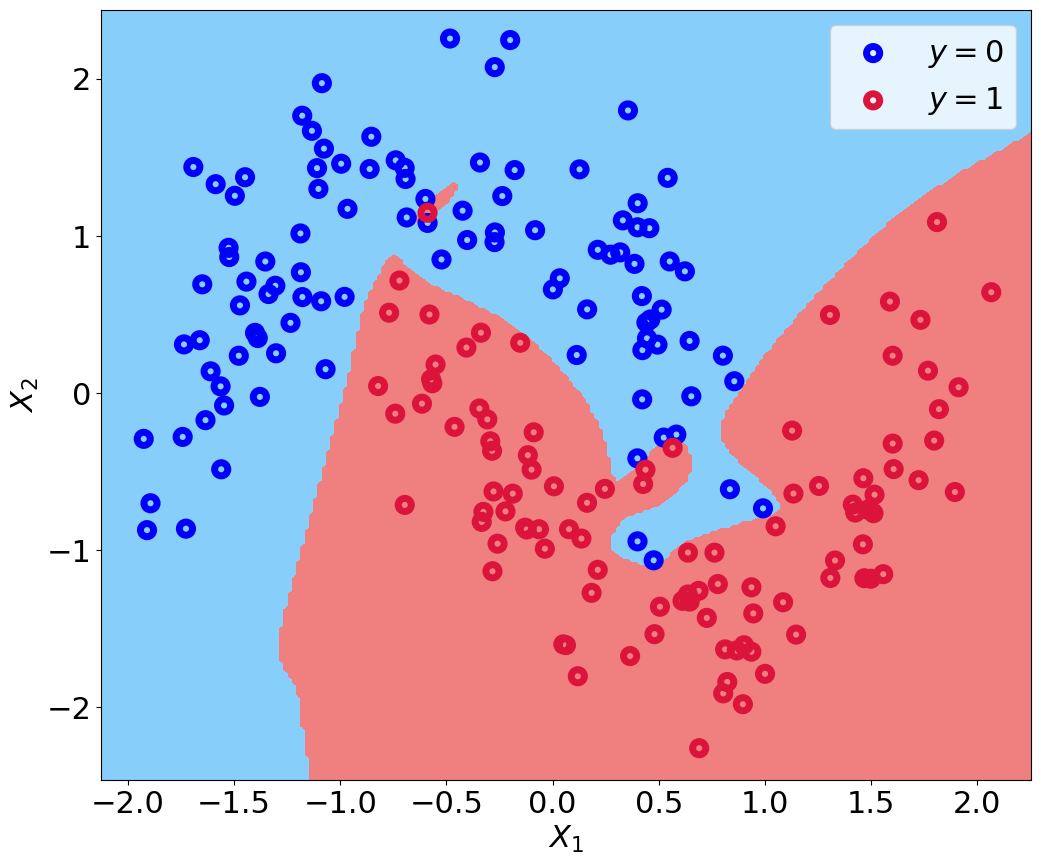

## Plot on the Testing Data

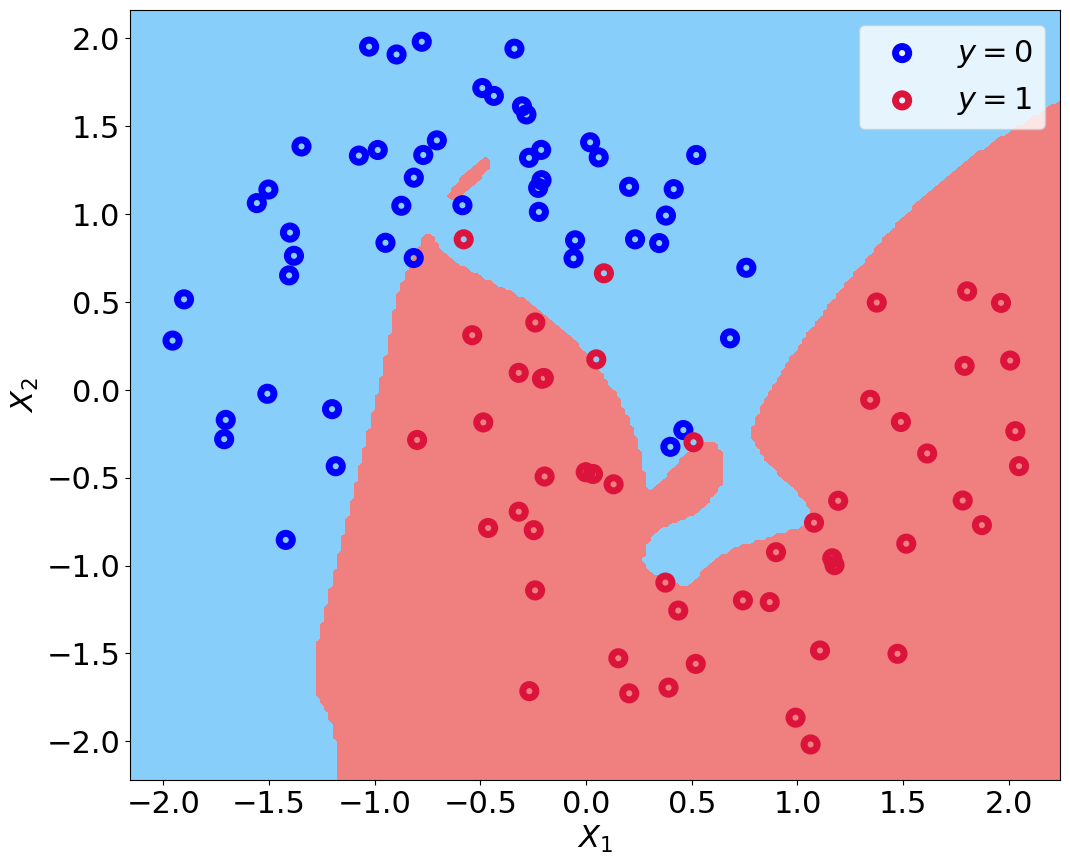

In [118]:
def plotMagic(debug=0):

    if debug:
        return

    thetas = genRandThetasArray([2,30,30,1],2)
    finalthetas,J = gradDesc(X_TRAIN_SCALED,Y_TRAIN,thetas,alpha=19,iterations=3000, lambd=0)

    printmd("## Plot on the Training Data")
    plotDecisionBoundary(X_TRAIN_SCALED,Y_TRAIN,"$X_1$","$X_2$",plotdecboundary=True, model=lambda x: predict(x,finalthetas),debug=debug)

    printmd("## Plot on the Testing Data")
    plotDecisionBoundary(X_TEST_SCALED,Y_TEST,"$X_1$","$X_2$",plotdecboundary=True, model=lambda x: predict(x,finalthetas),debug=debug)

plotMagic(debug=DEBUG)

---

## Part C -  Optimization of the Neural Network

When making use of Neural Networks (as with any other technique), it's important to optimize them. As a rule of thumb, it is always a good idea to use very high-order complex features and then use regularization to tone them down. In this way, we can use the CV set to compare a range of $\lambda$ values and determine which works best. This is also a good way to have only one variable (a.k.a hyper-parameter) to optimize i.e. $\lambda$, while eliminating other potential hyper-parameters, in this case, the number of layers and the number of nodes in the hidden layers.

Whereas with logistic and linear regression we had to manually produce a very large number of high-order polynomial features, and it was very expensive to do so (due to the large number features produced) even though it was likely that many/most of these weren't even contributing to a good accuracy, with Neural Networks we no longer need to touch the base features. We can automatically, seamlessly and efficiently produce more complex features in two ways:

1. We can cause the NN to automatically produce **a larger variety of features** simply by adding more hidden nodes in the hidden layer(s).

2. We can cause the NN to automatically produce **more complex / higher-order features** simply by adding more hidden layers.

So with NNs, a good rule of thumb is to use as large a number of hidden layers with as large a number of hidden nodes as possible (provided that we have a very large amount of data to learn from), and then optimize only the regularization parameter to ensure the best decision boundary. And this, my friends, is the base idea behind deep learning. Very large and deep network + a large amount of data + regularization = excellent performance.

Technically speaking, to optimize our NN, we would have had to start by creating a NN with the desired layers and nodes, and then proceed to determine a good learning rate using a similar technique as described previously. Once the learning rate was obtained, we would then use it to compare various values of $\lambda$. Keep this in mind for future purposes. For this prac, we'll skip the learning rate optimization procedure and proceed directly to optimizing $\lambda$.

Before continuing, let's import the f1 score function from sklearn to be able to compute this classification metric, which we'll use for optimization.

In [119]:
from sklearn.metrics import f1_score

In this practical, we're using a very small dataset (400 data points). Therefore, it doesn't make sense to go deeper than 2 hidden layers, but we can try having a large number of nodes in each layer e.g. 30 nodes. This is what we'll do.

Further below, I've fleshed out a function ```optimizeLambdas``` that will take in a ```thetas``` structure (e.g. as created by ```genRandThetasArray```) and a list containing values of $\lambda$ to compare, and return a list containing the F1 scores corresponding to NNs trained using each $\lambda$ value and evaluated on the CV set. Before we can complete that function, first go ahead and complete the function ```getThetasAndLambdasForOptimization``` in the cell below to do the following:

1. Initialize a ```thetas``` structure using the ```genRandThetasArray``` function for a NN with the following structure: 2 input nodes $\rightarrow$ 30 hidden nodes $\rightarrow$ 30 hidden nodes $\rightarrow$ 1 output node.

2. Create a list of $\lambda$ values called ```lambds``` with the following values in it $[0.0005, 0.0001, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1]$.

**[0.5 marks]**

In [120]:
def getThetasAndLambdasForOptimization():

    #FILL IN CODE BELOW:

    thetas = genRandThetasArray([2,30,30,1]) #Set this correctly as per above - Step 1

    lambds = [0.0005,0.0001,0.005,0.001,0.05,0.01,0.5,0.1] #Set this correctly as per above - Step 2

    #STOP FILLING IN HERE

    return thetas, lambds


The function above should return:

- a thetas ```dict``` with three $\Theta$ matrices, summarized as follows:

$\text{thetas}^1 \approx \begin{bmatrix} 0.417022 & 0.72032449 & 0.00011437\\
0.30233257 & 0.14675589 & 0.09233859\\
0.18626021 & 0.34556073 & 0.39676747\\
0.53881673 & 0.41919451 & 0.6852195\\
0.20445225 & 0.87811744 & 0.02738759\\
 . & .  &  . \\
 . & .  &  . \\
 . & .  &  . \\
0.1653542 & 0.92750858 & 0.34776586\\
0.7508121 & 0.72599799 & 0.88330609\\
0.62367221 & 0.75094243 & 0.34889834\\
0.26992789 & 0.89588622 & 0.42809119\\
0.96484005 & 0.6634415 & 0.62169572
\end{bmatrix}$<br>

$\text{thetas}^2 \approx \begin{bmatrix} 0.11474597 & 0.94948926 & 0.44991213 & \ldots  & 0.71152476 & 0.12427096 & 0.01988013\\
0.02621099 & 0.02830649 & 0.24621107 & \ldots  & 0.01255598 & 0.07197428 & 0.96727633\\
0.56810046 & 0.20329323 & 0.25232574 & \ldots  & 0.62971751 & 0.21017401 & 0.75275555\\
0.06653648 & 0.2603151 & 0.80475456 & \ldots  & 0.96326253 & 0.17395567 & 0.12632952\\
0.13507916 & 0.50566217 & 0.02152481 & \ldots  & 0.57785722 & 0.1840102 & 0.78792923\\
 . & . & .  & \ldots  &  . & . & . \\
 . & . & .  & \ldots  &  . & . & . \\
 . & . & .  & \ldots  &  . & . & . \\
0.75112104 & 0.57936054 & 0.92470418 & \ldots  & 0.46978904 & 0.97948335 & 0.36437807\\
0.77441013 & 0.5527676 & 0.88913109 & \ldots  & 0.47701299 & 0.44887884 & 0.88599797\\
0.52761877 & 0.40909083 & 0.26889202 & \ldots  & 0.11379636 & 0.65178928 & 0.40265685\\
0.32102631 & 0.55791199 & 0.99346046 & \ldots  & 0.52580197 & 0.07602388 & 0.87412594\\
0.95113562 & 0.8125073 & 0.28380183 & \ldots  & 0.3356638 & 0.05231295 & 0.60511678
\end{bmatrix}$<br>
$\text{thetas}^3 \approx \begin{bmatrix} \\
0.51206103 & 0.61746101 & 0.43235559 & 0.84770047 & \ldots  & 0.34486134 & 0.89785072 & 0.43459497 & 0.23581464
\end{bmatrix}$

- a ```list``` with $[0.0005, 0.0001, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1]$ in it. Nothing more nothing less.


In [121]:
#You can use this cell to test your function
THETASFOROPT, LAMBDSFOROPT = getThetasAndLambdasForOptimization()

printmd(getMatSizes(THETASFOROPT,"\\text{THETASFOROPT}"))

printmd(getMatSummary(THETASFOROPT[1],"\\text{THETASFOROPT^1}",showrowshead=5,showrowstail=5))
printmd(getMatSummary(THETASFOROPT[2],"\\text{THETASFOROPT^2}",showcolshead=3,showcolstail=3,showrowshead=5,showrowstail=5))
printmd(getMatSummary(THETASFOROPT[3],"\\text{THETASFOROPT^2}",5,5))

printmd(getMatSummary(np.array(LAMBDSFOROPT).reshape(1,-1),"\\text{LAMBDSFOROPT}"))

 - $\text{THETASFOROPT}^1$: $(30 \times 3)$ matrix
 - $\text{THETASFOROPT}^2$: $(30 \times 31)$ matrix
 - $\text{THETASFOROPT}^3$: $(1 \times 31)$ matrix

$\text{THETASFOROPT^1} \approx \begin{bmatrix} 
0.417022 & 0.72032449 & 0.00011437\\
0.30233257 & 0.14675589 & 0.09233859\\
0.18626021 & 0.34556073 & 0.39676747\\
0.53881673 & 0.41919451 & 0.6852195\\
0.20445225 & 0.87811744 & 0.02738759\\
 . & .  &  . \\
 . & .  &  . \\
 . & .  &  . \\
0.1653542 & 0.92750858 & 0.34776586\\
0.7508121 & 0.72599799 & 0.88330609\\
0.62367221 & 0.75094243 & 0.34889834\\
0.26992789 & 0.89588622 & 0.42809119\\
0.96484005 & 0.6634415 & 0.62169572
\end{bmatrix}$

$\text{THETASFOROPT^2} \approx \begin{bmatrix} 
0.11474597 & 0.94948926 & 0.44991213 & \ldots  & 0.71152476 & 0.12427096 & 0.01988013\\
0.02621099 & 0.02830649 & 0.24621107 & \ldots  & 0.01255598 & 0.07197428 & 0.96727633\\
0.56810046 & 0.20329323 & 0.25232574 & \ldots  & 0.62971751 & 0.21017401 & 0.75275555\\
0.06653648 & 0.2603151 & 0.80475456 & \ldots  & 0.96326253 & 0.17395567 & 0.12632952\\
0.13507916 & 0.50566217 & 0.02152481 & \ldots  & 0.57785722 & 0.1840102 & 0.78792923\\
 . & . & .  & \ldots  &  . & . & . \\
 . & . & .  & \ldots  &  . & . & . \\
 . & . & .  & \ldots  &  . & . & . \\
0.75112104 & 0.57936054 & 0.92470418 & \ldots  & 0.46978904 & 0.97948335 & 0.36437807\\
0.77441013 & 0.5527676 & 0.88913109 & \ldots  & 0.47701299 & 0.44887884 & 0.88599797\\
0.52761877 & 0.40909083 & 0.26889202 & \ldots  & 0.11379636 & 0.65178928 & 0.40265685\\
0.32102631 & 0.55791199 & 0.99346046 & \ldots  & 0.52580197 & 0.07602388 & 0.87412594\\
0.95113562 & 0.8125073 & 0.28380183 & \ldots  & 0.3356638 & 0.05231295 & 0.60511678
\end{bmatrix}$

$\text{THETASFOROPT^2} \approx \begin{bmatrix} 
0.51206103 & 0.61746101 & 0.43235559 & 0.84770047 & 0.45405906 & \ldots  & 0.9734874 & 0.34486134 & 0.89785072 & 0.43459497 & 0.23581464\\
\end{bmatrix}$

$\text{LAMBDSFOROPT} \approx \begin{bmatrix} 
0.0005 & 0.0001 & 0.005 & 0.001 & 0.05 & 0.01 & 0.5 & 0.1\\
\end{bmatrix}$

Ok now we'll complete the ```optimizeLambdas``` function which takes in a ```thetas``` structure and a list of $\lambda$ values to compare (both of which we'll obtain by calling ```getThetasAndLambdasForOptimization```. Complete the function below to do only the following steps:

- Loop through the values of the ```lambds``` list passed into the function; for each ```lambd``` value:

    1. Train a NN as follows: call gradient descent using ```X_TRAIN_SCALED```, ```Y_TRAIN``` and the ```thetas``` structure you created, with ```alpha=19```, ```iterations=iterations``` and using the value ```lambd``` currently in the loop. Store the resulting optimized $\theta$ parameters obtained by gradient descent in a variable called ```finalthetas```. Yes, ```iterations=iterations``` is correct. The parameter ```iterations``` is being read into the function as a parameter.
    
    2. Use the ```predict``` function to make a prediction on ```X_CV_SCALED``` (the CV set) using the ```finalthetas``` obtained in the previous step. This will help us obtain an indication of how the model with current ```lambd``` value is doing on a set that is separate to the training set (the CV set). Store the predicted values in ```ycvpred```.
    
    3. Obtain the F1 score by making a call to the ```f1_score``` function which we've already imported from ```sklearn```. Store the current F1 score in a variable called ```f1perf```.
    
    4. Append ```f1perf``` to the list ```lambdsf1``` that has already been created in the function.
    

If you examine the structure above, you'll see that it aims to take a bunch of $\lambda$ values, train a complex sufficiently deep NN on each, and then evaluate each NN on the CV set using the F1 score as a metric.

Finally, note that there is an extra "debug" parameter being passed into ```optimizeLambdas``` function. Don't touch this in anyway. This will be used to speed up marking with the auto-marker.

**[2 marks]**

In [122]:
def optimizeLambdas(thetas, lambds, debug=0, iterations=3000):

    lambdsf1 = [] #Don't change - this will need to be filled with F1 scores in the loop below


    if debug: #DO NOT TOUCH
        return lambdsf1 #DO NOT TOUCH

    for lambd in lambds: #Don't change - for each lambda value being compared:
        print("Optimizing for {}".format(lambd))

        #FILL IN CODE BELOW:

        finalthetas = gradDesc(X_TRAIN_SCALED, Y_TRAIN, thetas, alpha=19, iterations=iterations, lambd=lambd) #This needs to be set

        ycvpred = predict(X_CV_SCALED, finalthetas) #This needs to be set

        f1perf = f1_score(Y_CV.flatten(), ycvpred.flatten(), average='weighted') #This needs to be set

        lambdsf1.append(f1perf)

        #STOP FILLING IN HERE

    return lambdsf1 #Don't change - return the F1 scores





The function will be called in the cell below. You shouldn't get any, but if you do, just ignore any divide by zero warnings. If you did it right, it should print a ```list``` as follows:

[0.9607843137254902, 0.9345794392523363, 0.970873786407767, 0.9607843137254902, 0.9803921568627451, 0.970873786407767, 0.8627450980392156, 0.8571428571428572]

In [123]:
F1SCORESTOCOMPARE = optimizeLambdas(THETASFOROPT, LAMBDSFOROPT,debug=DEBUG)
print("Here are the f1 scores:\n",F1SCORESTOCOMPARE)

Optimizing for 0.0005


AttributeError: 'tuple' object has no attribute 'keys'

Now let's plot the scores:

In [ ]:
plt.figure(figsize=(12, 10))
plt.plot(list(map(str,LAMBDSFOROPT)),F1SCORESTOCOMPARE)
plt.xlabel("$\lambda$")
plt.xticks(rotation=90)
plt.ylabel("F1 Score on CV Set")

You should hopefully see that for values of $\lambda$ towards the left of the graph, the F1 score is quite similar, all above 90% and with variation of only about 4%. This is because the data set we're using is very "sanitary" and the CV set resembled the training set very closely. In practice, with a real dataset, the graph of F1 score versus $\lambda$ would most likely have been a bell-shape, with lower F1 scores for smaller $\lambda$ values to the left of the graph (as the NN overfits the training set and does poorly on the CV set), an increase in F1 score and apex somewhere in the middle (as regularization helps to ease the overfitting thereby doing well on the CV set) which is what we see somehwere in the middle of the graph produced (with the highest F1 score corresponding to $\lambda = 0.05$ above, and then a sharp decline in F1 score to the right of the graph (as too much regularization causes the NN decision boundary to just become a useless straight line), which is exactly what we see above.

Since we're using a data set with only two features, we have the rare luxury of plotting the data and visualizing the decision boundary (something you most likely wouldn't have when using any real data set - in which case you would just have to use the F1 scores produced without visualizing them to determine which NN is doing best). In the cells below, we'll plot the decision boundaries for three $\lambda$ values: the most overfitting/variance found on the left of the graph above ($\lambda = 0.0005$), the most underfitting/bias found to the right of the above graph ($\lambda = 0.1$ and $\lambda = 0.5$ were very close), and finally the $\lambda$ that is "just right" i.e. not overfitting or underfitting, found somewhere in the middle of the above graph ($\lambda = 0.05$).

In [ ]:
if (DEBUG): #DON'T CHANGE
    ABC() #DON'T CHANGE

printmd("## Too little regularization - too much overfitting/variance")

THETAS = genRandThetasArray([2,30,30,1])
FINALTHETASOVERFIT,J = gradDesc(X_TRAIN_SCALED,Y_TRAIN,THETAS,alpha=19,iterations=3000, lambd=0.0005)
plotDecisionBoundary(X_CV_SCALED,Y_CV,"$X_1$","$X_2$",plotdecboundary=True, model=lambda x: predict(x,FINALTHETASOVERFIT),debug=DEBUG)

In [ ]:
if (DEBUG): #DON'T CHANGE
    ABC() #DON'T CHANGE

printmd("## Too much regularization - too much underfitting/bias")

THETAS = genRandThetasArray([2,30,30,1])
FINALTHETASUNDERFIT,J = gradDesc(X_TRAIN_SCALED,Y_TRAIN,THETAS,alpha=19,iterations=3000, lambd=0.5)
plotDecisionBoundary(X_CV_SCALED,Y_CV,"$X_1$","$X_2$",plotdecboundary=True, model=lambda x: predict(x,FINALTHETASUNDERFIT))

In [ ]:
if (DEBUG): #DON'T CHANGE
    ABC() #DON'T CHANGE

printmd("## JUST RIGHT - Not Overfitting or Underfitting")

THETAS = genRandThetasArray([2,30,30,1])
FINALTHETASJUSTRIGHT,J = gradDesc(X_TRAIN_SCALED,Y_TRAIN,THETAS,alpha=19,iterations=3000, lambd=0.05)
plotDecisionBoundary(X_CV_SCALED,Y_CV,"$X_1$","$X_2$",plotdecboundary=True, model=lambda x: predict(x,FINALTHETASJUSTRIGHT))

And if you look at the "Just right" plot above, you can see that the decision boundary is exactly what it should intuitively be. Congratulations.

---

## Part D -  Evaluating the Final Optimized Model

And finally, once we've selected our final optimized model using cross-validation on the CV set, we need to do a final test to see how it really works on a slightly different set i.e. the test set. That happens below.

In [ ]:
YPREDTEST = predict(X_TEST_SCALED,FINALTHETASJUSTRIGHT)
print("Final F1 score on the test set: ", f1_score(Y_TEST,YPREDTEST))

---
## Part E - Demonstrating Multi-Class Classification Capabilities

If you did everything above correctly, we should just be able to use the very same functions that have been completed to carry out multi-class classification. We'll load and scale a multi-class dataset. Since this is purely for demonstration purposes, we won't split the data up into train, CV or test sets; we'll train on the whole data set and then plot the decision boundary to see how it works. The only difference in this case will be that we will have to ensure that we have the right number output nodes.

Feel free to increase ```K``` in the code below, but note that my ```plotDecisionBoundary``` function only caters for a max of 7 classes. If you increase ```K``` to 8 and beyond, it will throw it's toys out the cot, in figurative terms. If you want it to work, you'll have to figure out how to fix it. Hint: I've had to manually specify point colours and their respective matching decision boundary background colours, and I've only specified 7 of them. If you can specify more, it should just work out-the-box.

Also feel free to toy with the ```lambd``` and ```alpha``` parameters.

In [ ]:
if (DEBUG): #DON'T CHANGE
    ABC() #DON'T CHANGE

K = 5
multiclassdata = load_multiclass_dataset(N=400, K=K)
X, Y = multiclassdata

X_SCALED, _ = getScaledX(X)

MULTICLASSTHETAS = genRandThetasArray([2,30,30,K])
MULTIFINALTHETAS,J = gradDesc(X_SCALED,Y,MULTICLASSTHETAS,alpha=1,iterations=3000, lambd=0.1)

printmd("## Plot on the Training Data")
plotDecisionBoundary(X_SCALED,Y,"$X_1$","$X_2$",plotdecboundary=True, model=lambda x: predict(x,MULTIFINALTHETAS))


---

## Part F -  Creating a Similar Neural Network Using Keras / TensorFlow (OPTIONAL)

And finally, (and this part if optional), we'll create a similar neural network using Keras. I call it similar because we won't use the sigmoid activation function in any of the hidden layers (but only in the output layer). Rather, we'll use the ReLU activation function in the hidden layers which works much much better. Feel free to experiment below.

If you don't already have TensorFlow and Keras, go ahead and install them into your Python install. In most cases, running the following two lines of code in your terminal should be sufficient to install both TensorFlow and Keras, both of which you'll need to make this part of the prac work:

```pip install tensorflow```<br>
```pip install keras```

If these don't work, you'll have to do some Internet searching to find out how to get it installed on your machine.

If you've managed to get them installed, go ahead and run the cells below.

Also note that there is a wealth of information on Keras online. If you have any interest in ML whatsoever, you will want to go and do a lot of watching and reading and experimenting with Keras. In the real-world, you will definitely want to use efficient, fast, tried-and-tested and full-featured APIs such as Keras, rather than implementing and using a NN of your own.

In [ ]:
if (DEBUG): #DON'T CHANGE
    ABC() #DON'T CHANGE

from keras.models import Sequential
from keras.layers import Dense,Activation
import keras

In [ ]:
if (DEBUG): #DON'T CHANGE
    ABC() #DON'T CHANGE

#Create a sequential feed-forward neural network - yes, there are other types
model = Sequential()

model.add(Dense(units=30,input_dim=2)) #First hidden layer with 30 nodes, being fed two features (input nodes)
model.add(Activation('relu')) #Apply relu activation - for hidden nodes, this works much better than sigmoid activation
model.add(Dense(units=30)) #Second hidden layer with 30 nodes
model.add(Activation('relu')) #Apply relu activation - for hidden nodes, this works much better than sigmoid activation
model.add(Dense(units=1)) #Output layer with one node
model.add(Activation('sigmoid')) #Apply sigmoid activation - because we NEED the output of this network to be a value between 0 and 1


In [ ]:
if (DEBUG): #DON'T CHANGE
    ABC() #DON'T CHANGE

model.compile(loss=keras.losses.binary_crossentropy,
             optimizer="adam") #Set up the model to use binary_crossentropy as the cost/loss function, which is the same cost function we've been using i.e. -(ylog(h(x)) + (1-y)(1-h(x))
# model.summary() #Uncomment if you like. It just provides a print out of the layers

In [ ]:
if (DEBUG): #DON'T CHANGE
    ABC() #DON'T CHANGE

model.fit(X_train_scaled,Y_TRAIN,validation_data=(X_cv_scaled,Y_CV), epochs=250,verbose=1) #Go ahead and optimize the parameters/weights over 500 iterations/epochs

In [ ]:
if (DEBUG): #DON'T CHANGE
    ABC() #DON'T CHANGE

def keraspredict(X):
    ypredtest = (model.predict(X) >= 0.5).astype("int") #Make predictions on the test set and binarize them
    return ypredtest

ypredtest = keraspredict(X_test_scaled)
f1_score(Y_TEST,ypredtest) #Compute f1 score on test set

In [ ]:
plotDecisionBoundary(X_train_scaled,Y_TRAIN,"$X_1$","$X_2$",plotdecboundary=True, model=keraspredict, debug=DEBUG)

---

## Part Z: (Last Part): Have Some Fun With Various Datasets (Also Optional)

As promised, below I've provided code that allows you to specify any one of the many data sets and apply your NN code to it. Enjoy.

Note that you only really need to change the variables at the very top. Everything else should just work.

In [ ]:
#Here's all the variables you could possibly want to set

N = 400 #No of points to load in the data sets
dataset = 'planar' #name of the data set to load - look in the 'datasets' dict below for more names. I personally really like planar
NNlayers = [2,30,30,1] #Remember that the input layer must have 2 nodes, and the output layer must have 1 node (we're only using binary data sets here)
ALPHA = 1
LAMBD = 0
K_ITERS = 3000

#You need not change anything below - unless you want to


if (DEBUG): #DON'T CHANGE
    ABC() #DON'T CHANGE

from planar_utils import *

noisy_circles, noisy_moons, blobs, gaussian_quantiles = load_extra_datasets(N)
planar_data = load_planar_dataset()


datasets = {'noisy_circles': noisy_circles,
            'noisy_moons': noisy_moons,
            'blobs': blobs,
            'gaussian_quantiles': gaussian_quantiles,
            'planar': planar_data}

X, Y = datasets[dataset]

print(X.shape)
print(Y.shape)

X, Y = X.T, Y.reshape(1,-1)

# make blobs binary
if dataset == "blobs":
    Y = Y%2

X,Y = X.T,Y.T

X_SCALED, _ = getScaledX(X)

THETS = genRandThetasArray(NNlayers)

FINALTHETS,J = gradDesc(X_SCALED,Y,THETS,alpha=ALPHA,iterations=K_ITERS, lambd=LAMBD)

plotDecisionBoundary(X_SCALED,Y,"$X_1$","$X_2$",plotdecboundary=True, model=lambda x: predict(x,FINALTHETS))


